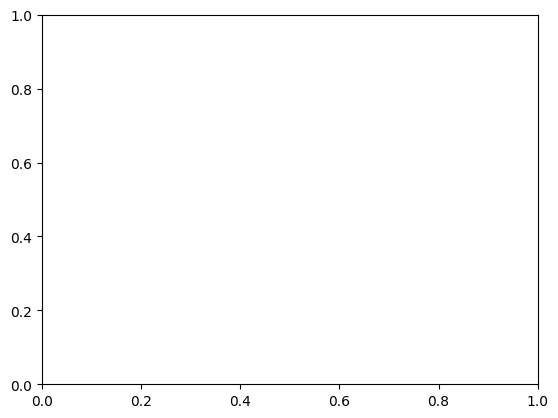

In [2]:
# %matplotlib widget 
import pandas as pd
from torque_log_analysis import resample_data,drop_rows_from_df
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

In [3]:
# Open log
path = (r"C:\Users\Matthew Samson\Documents\formula\4_2_2024_KS7e First Shakedown\parsed-data")
# path = r"C:\Users\Matthew Samson\Downloads\OneDrive_1_4-4-2024"
path = (r"C:\Users\Matthew Samson\Documents\formula\228hvVoltageDropout\parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\228hvVoltageDropout\parsed-data")
path = (r"C:/Users/Matthew Samson/Documents/formula/4_9_dyno_faults/parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\4_9_drivelineYeet\parsed-data")
path = (r"C:\Users\Matthew Samson\Documents\formula\4_13_sprocketYeetTwo\parsed-data")
# path = (r"C:\Users\Matthew Samson\Documents\formula\10_16_23 Dyno day\240nm vehicle logs\parsed-data")
logs = {}
for filename in os.listdir(path):
            if filename.endswith('.csv') or filename.endswith('.CSV'):
                file_path = os.path.join(path, filename)
                # try:
                df = pd.read_csv(file_path)
                # df['Time'] = pd.to_datetime(
                #     df["Time"], unit='ms')  # Convert epoch time to datetime
                # df.set_index("Time", inplace=True)  # Set 'Time' as index
                            # Drop the first 50 rows
                # df = df.drop(df.index[:10])
                df = resample_data(df,"Time",10)
                # df = drop_rows_from_df(df,"APPS1")
                # Reset the index if you want
                # df = df.reset_index(drop=True)
                df['D3_Id']=df['D3_Id']*-1
                logs[filename] = df
                # except:
                #     print(f"Error with {filename}")
                #     continue


In [4]:
for name,df in logs.items():
    for i in (list(df)):
        if 'current' in i or 'Current' in i:
            print(i)

D1_Phase_A_Current
D2_Phase_B_Current
D3_Phase_C_Current
D4_DC_Bus_Current
Pack_Current
D1_Max_Discharge_Current
D2_Max_Charge_Current
Pack_Current
D1_Phase_A_Current
D2_Phase_B_Current
D3_Phase_C_Current
D4_DC_Bus_Current
D1_Max_Discharge_Current
D2_Max_Charge_Current


In [5]:
for name,df in logs.items():
    for i in (list(df)):
        if 'Volt' in i or 'volt' in i:
            print(i)

D1_DC_Bus_Voltage
D2_Output_Voltage
D3_VAB_Vd_Voltage
D4_VBC_Vq_Voltage
D1_Reference_Voltage_1_5
D2_Reference_Voltage_2_5
D3_Reference_Voltage_5_0
D4_Reference_Voltage_12_0
acu_glv_voltage
acu_sdc_voltage
acu_5v_voltage
Pack_Open_Voltage
Pack_Inst_Voltage
Pack_Summed_Voltage
precharge_accVoltageMod100
precharge_accVoltageDiv100
precharge_tsVoltageMod100
precharge_tsVoltageDiv100
Pack_Open_Voltage
Pack_Inst_Voltage
Pack_Summed_Voltage
D1_DC_Bus_Voltage
D2_Output_Voltage
D3_VAB_Vd_Voltage
D4_VBC_Vq_Voltage
D1_Reference_Voltage_1_5
D2_Reference_Voltage_2_5
D3_Reference_Voltage_5_0
D4_Reference_Voltage_12_0
acu_glv_voltage
acu_sdc_voltage
acu_5v_voltage
precharge_accVoltageMod100
precharge_accVoltageDiv100
precharge_tsVoltageMod100
precharge_tsVoltageDiv100


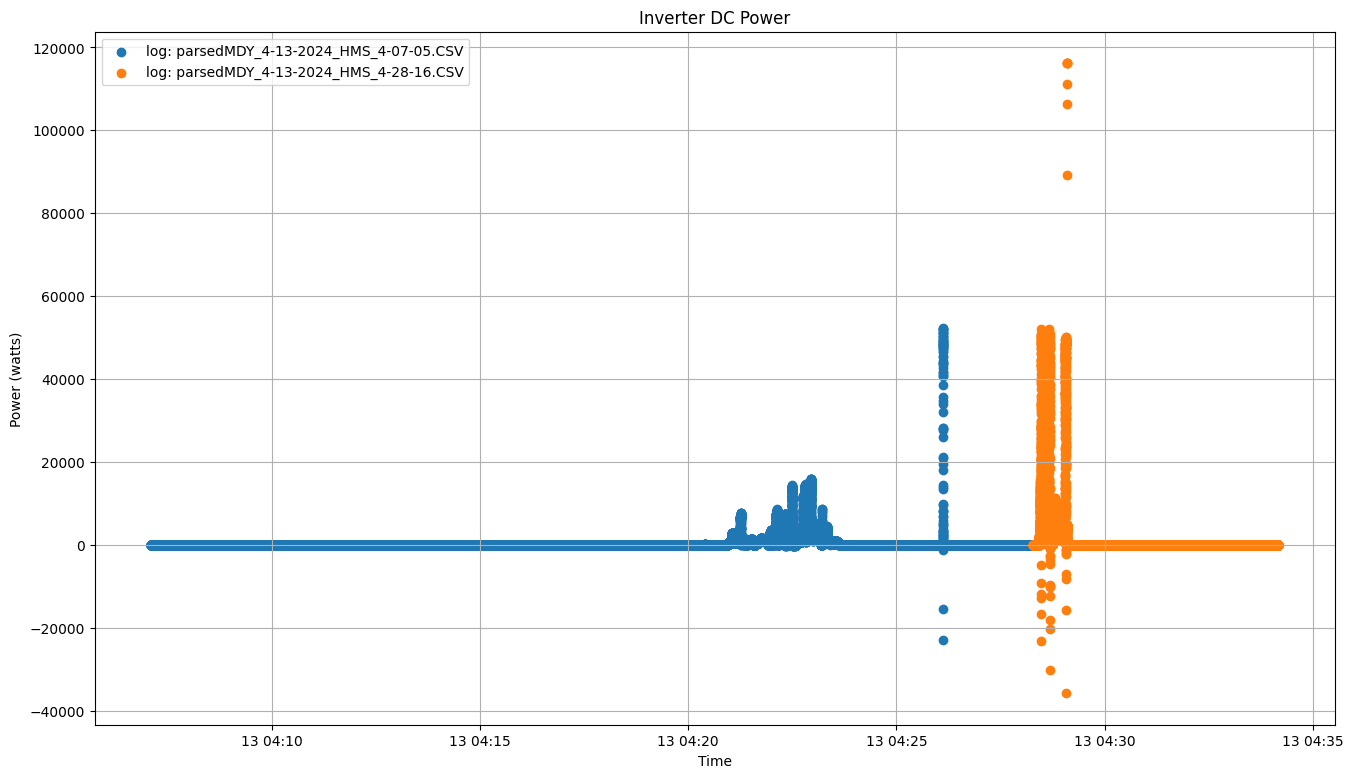

In [6]:
plt.figure(figsize=(16,9))

for name,df in logs.items():
    plt.scatter(df.index,df['D1_DC_Bus_Voltage']*df['D4_DC_Bus_Current'],label=f'log: {name}')
plt.grid(True)
plt.xlabel("Time")
plt.legend()
# plt.xlim((32750,33200))
plt.ylabel("Power (watts)")
plt.title("Inverter DC Power")
plt.show()


In [7]:
print(logs.keys())

dict_keys(['parsedMDY_4-13-2024_HMS_4-07-05.CSV', 'parsedMDY_4-13-2024_HMS_4-28-16.CSV'])


Time
2024-04-13 04:07:06.000       0.00
2024-04-13 04:07:06.010       0.01
2024-04-13 04:07:06.020       0.02
2024-04-13 04:07:06.030       0.03
2024-04-13 04:07:06.040       0.04
                            ...   
2024-04-13 04:28:14.620    1268.62
2024-04-13 04:28:14.630    1268.63
2024-04-13 04:28:14.640    1268.64
2024-04-13 04:28:14.650    1268.65
2024-04-13 04:28:14.660    1268.66
Freq: 10L, Name: elapsed_time, Length: 126867, dtype: float64


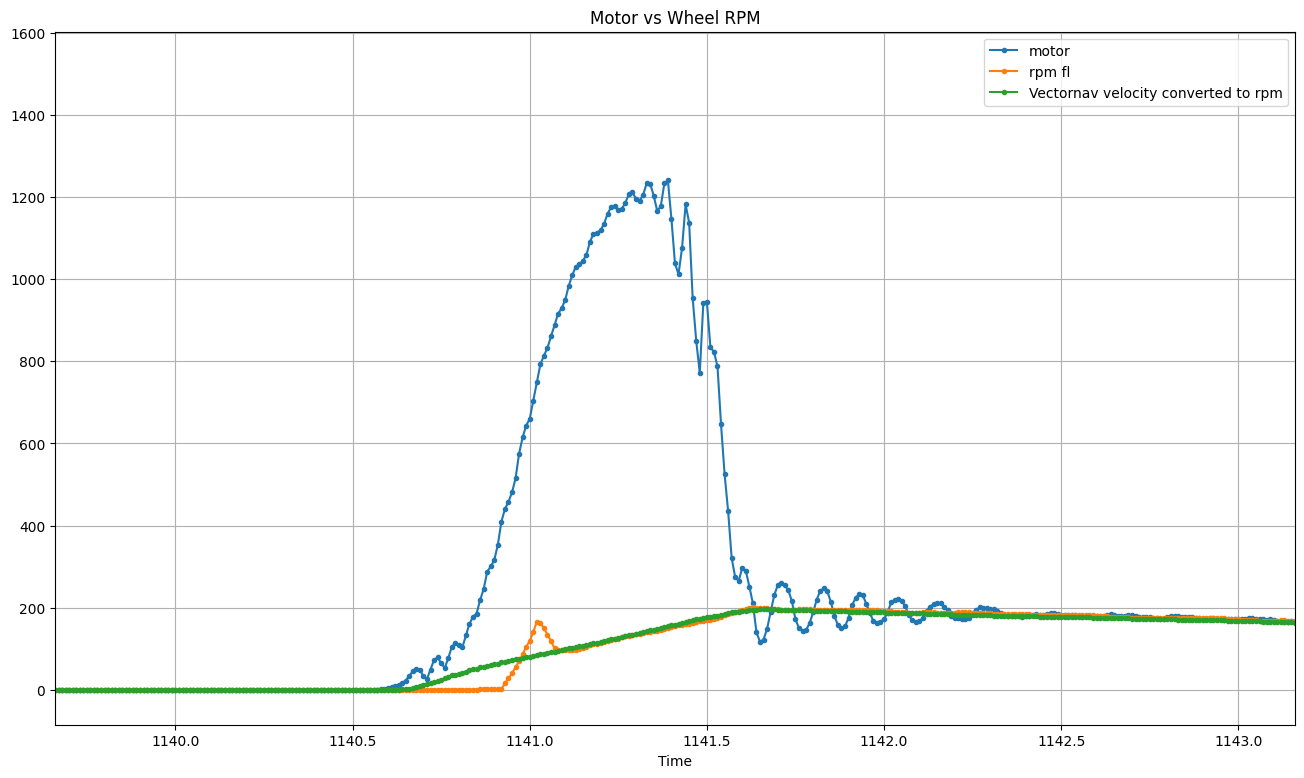

Time
2024-04-13 04:28:16.690      0.00
2024-04-13 04:28:16.700      0.01
2024-04-13 04:28:16.710      0.02
2024-04-13 04:28:16.720      0.03
2024-04-13 04:28:16.730      0.04
                            ...  
2024-04-13 04:34:10.250    353.56
2024-04-13 04:34:10.260    353.57
2024-04-13 04:34:10.270    353.58
2024-04-13 04:34:10.280    353.59
2024-04-13 04:34:10.290    353.60
Freq: 10L, Name: elapsed_time, Length: 35361, dtype: float64


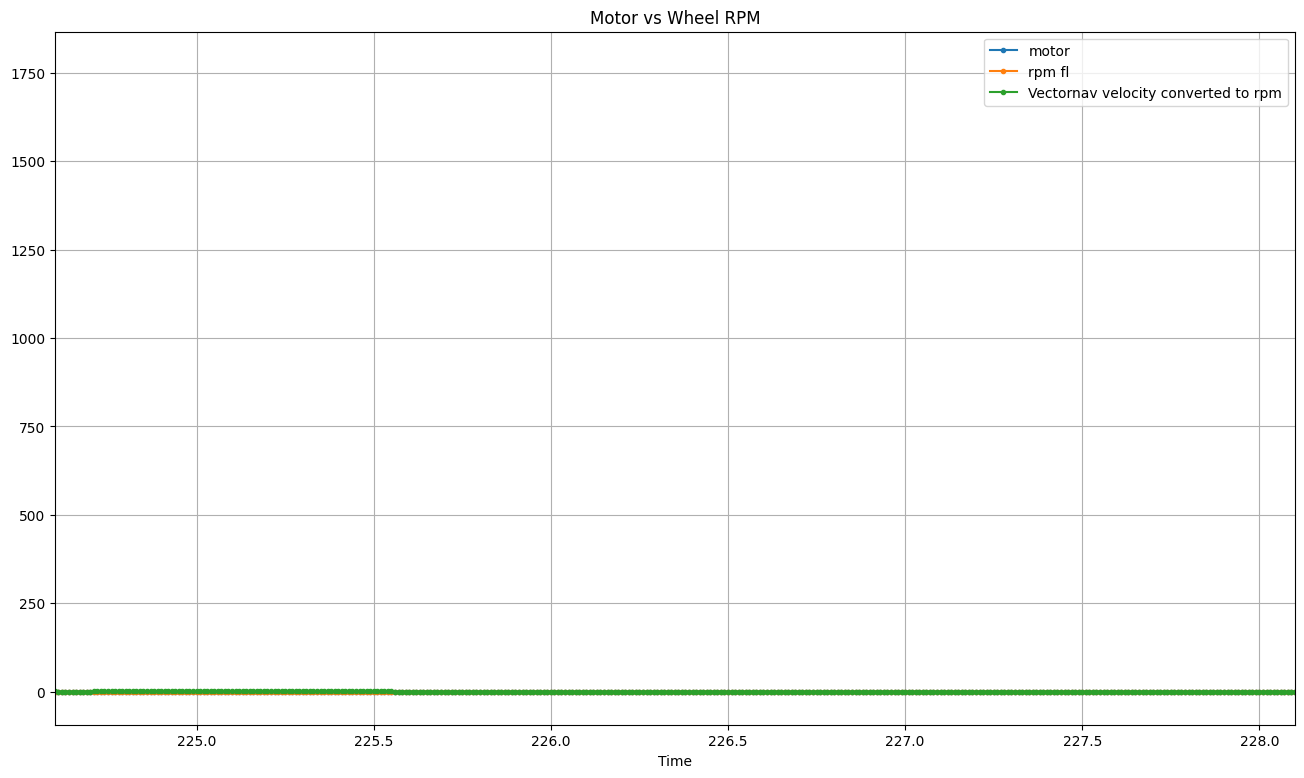

In [8]:

for name,df in logs.items():
    df = logs[name]
    def convert_to_elapsed_time(df):
        df['elapsed_time'] = (df.index - df.index[0]).total_seconds()
        return df
    df = convert_to_elapsed_time(df)
    print(df['elapsed_time'])
    joedf = pd.read_csv('ENERGUS72s8pemrax228hvtorquecurvewithSag.csv')
    xlim = (df['elapsed_time'].max()-129,df['elapsed_time'].max()-125.5)
    plt.figure(figsize=(16,9))
    plt.grid(True)
    plt.plot(df['elapsed_time'],df['D2_Motor_Speed']/3,label='motor',marker='.')
    plt.plot(df['elapsed_time'],df['vcu_rpm_front_left'],label='rpm fl',marker='.')
    plt.plot(df['elapsed_time'],np.sqrt(df['evelogger_vectornav_v_n']**2+df['evelogger_vectornav_v_e']**2)/(3.14*2*0.229)*60,label='Vectornav velocity converted to rpm',marker='.')

    plt.title("Motor vs Wheel RPM")
    plt.legend()
    plt.xlim(xlim)
    plt.xlabel("Time")
    plt.show()


Time
2024-04-13 04:07:06.000       0.00
2024-04-13 04:07:06.010       0.01
2024-04-13 04:07:06.020       0.02
2024-04-13 04:07:06.030       0.03
2024-04-13 04:07:06.040       0.04
                            ...   
2024-04-13 04:28:14.620    1268.62
2024-04-13 04:28:14.630    1268.63
2024-04-13 04:28:14.640    1268.64
2024-04-13 04:28:14.650    1268.65
2024-04-13 04:28:14.660    1268.66
Freq: 10L, Name: elapsed_time, Length: 126867, dtype: float64


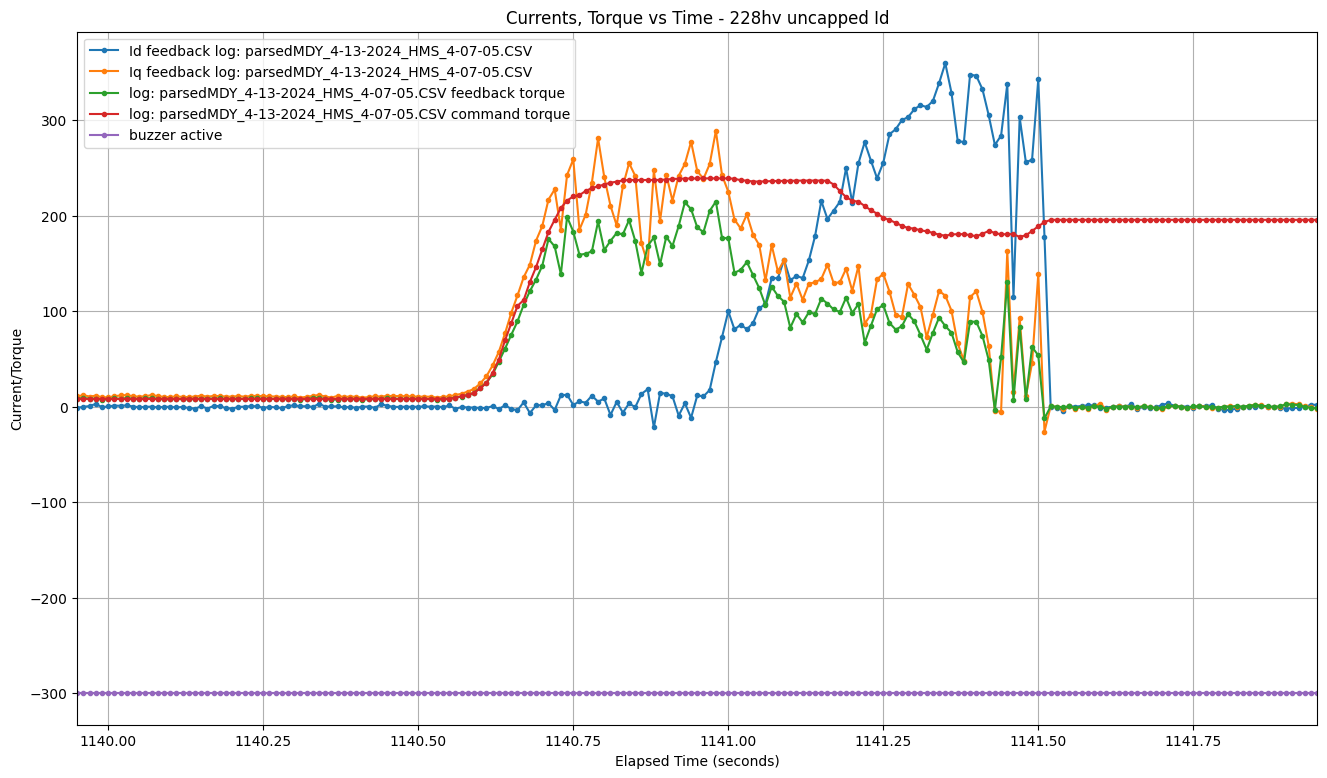

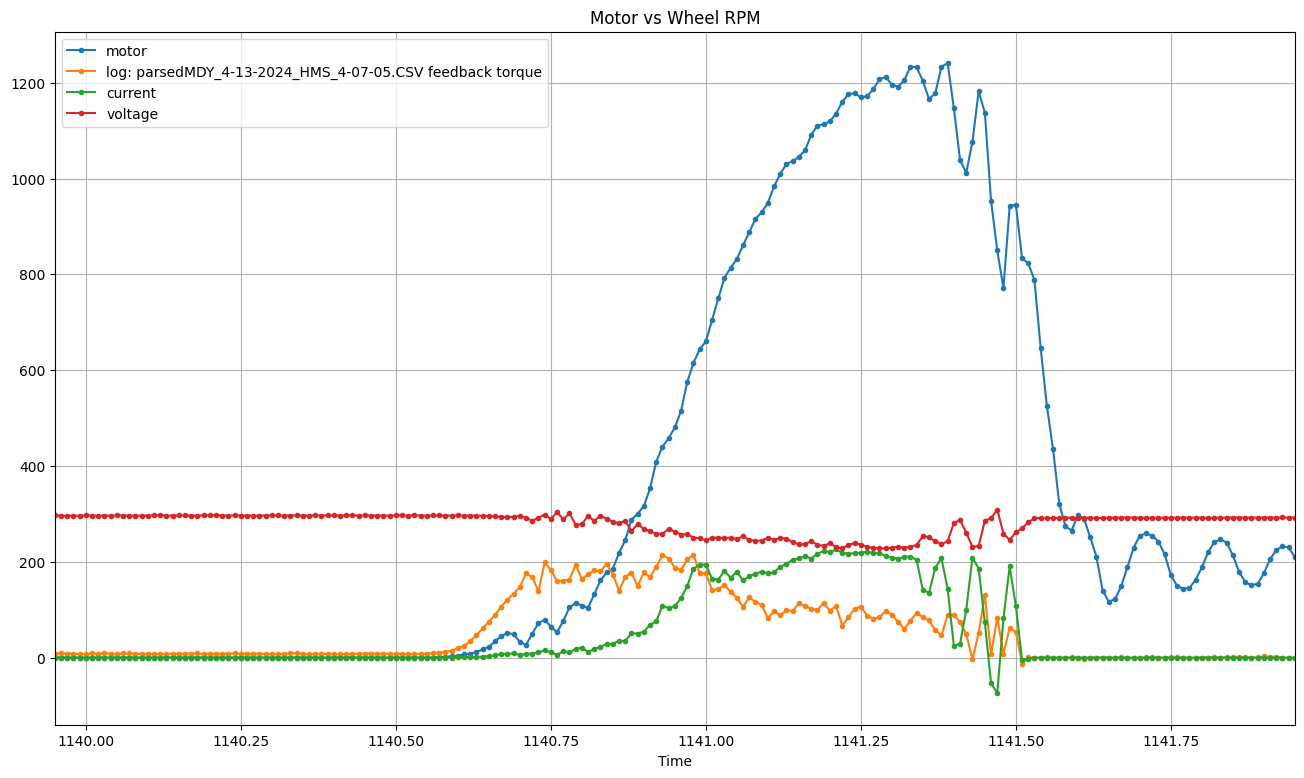

Time
2024-04-13 04:28:16.690      0.00
2024-04-13 04:28:16.700      0.01
2024-04-13 04:28:16.710      0.02
2024-04-13 04:28:16.720      0.03
2024-04-13 04:28:16.730      0.04
                            ...  
2024-04-13 04:34:10.250    353.56
2024-04-13 04:34:10.260    353.57
2024-04-13 04:34:10.270    353.58
2024-04-13 04:34:10.280    353.59
2024-04-13 04:34:10.290    353.60
Freq: 10L, Name: elapsed_time, Length: 35361, dtype: float64


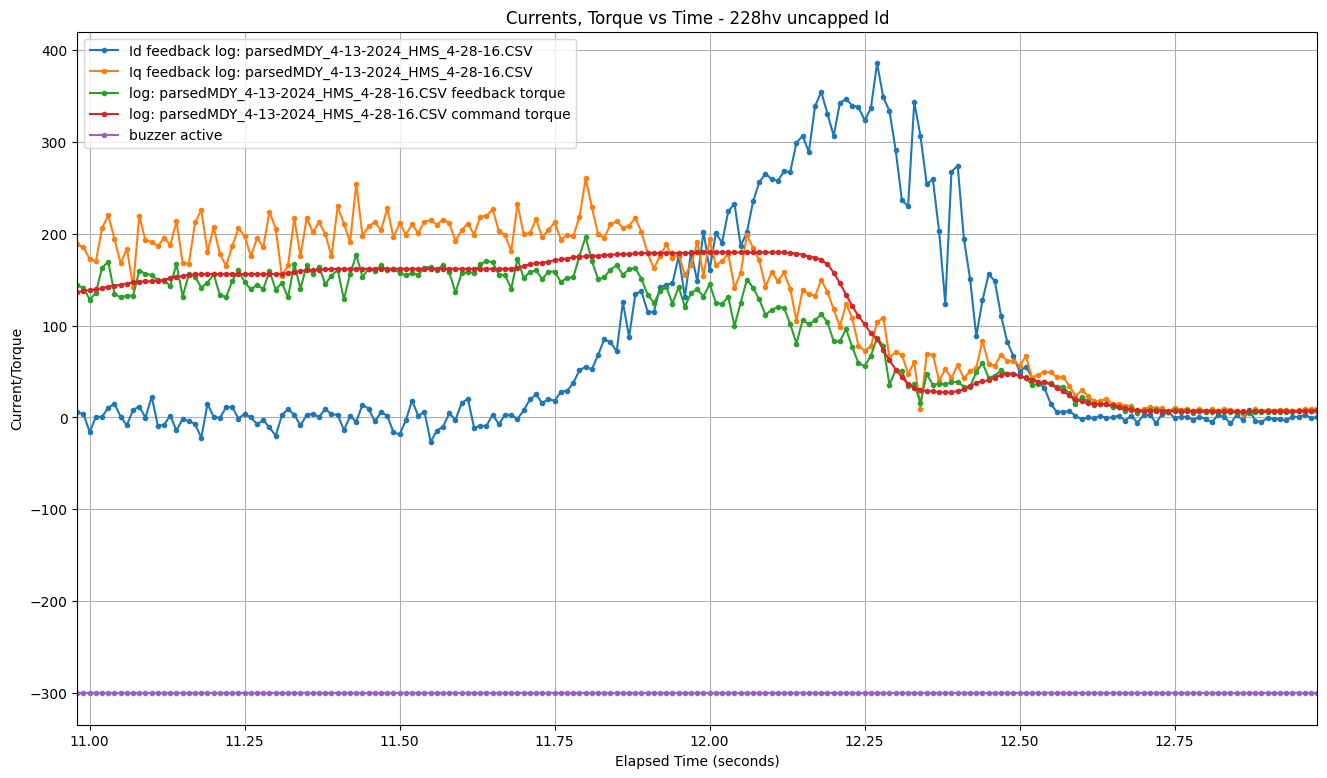

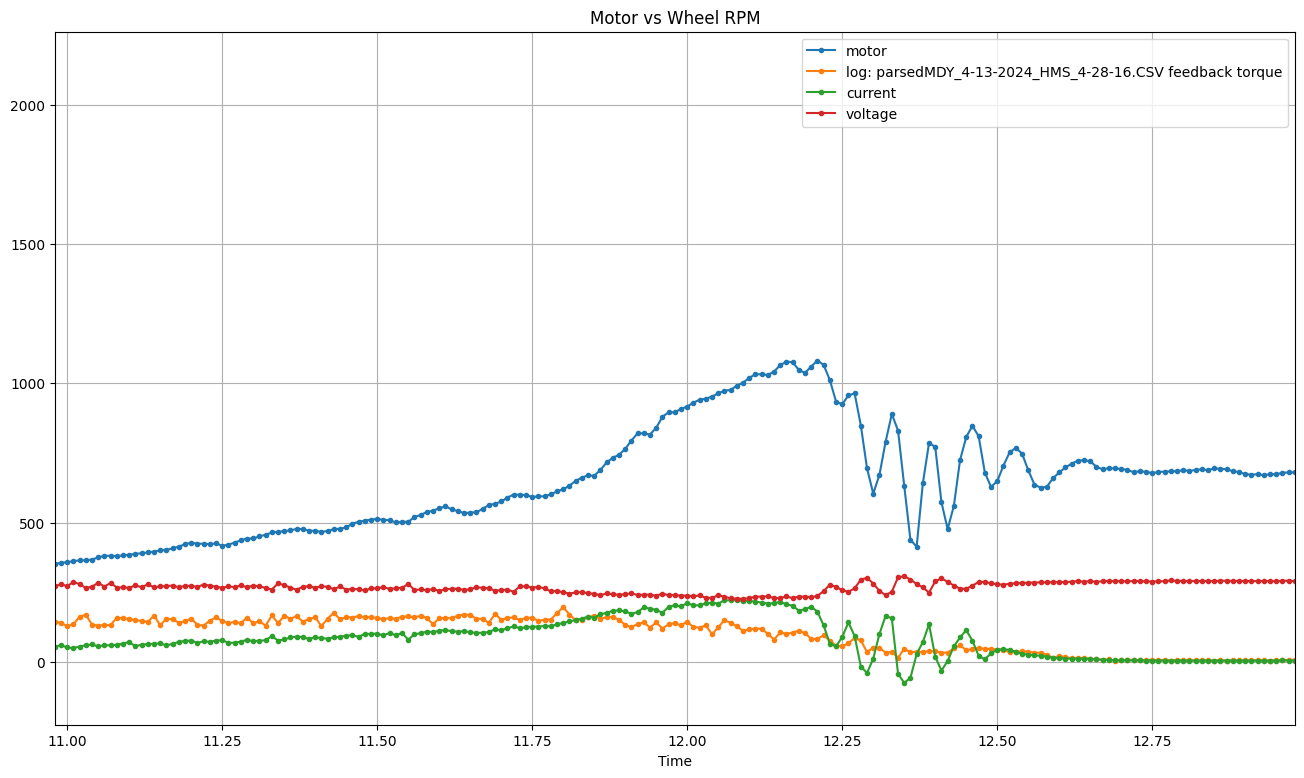

In [9]:

for name,df in logs.items():
    df = logs[name]
    def convert_to_elapsed_time(df):
        df['elapsed_time'] = (df.index - df.index[0]).total_seconds()
        return df
    df = convert_to_elapsed_time(df)
    print(df['elapsed_time'])
    # xlim = (df['elapsed_time'].max()-135,df['elapsed_time'].max()-125.5)
    max_torque_index = df['D1_Commanded_Torque'].idxmax()
    xlim = (df['elapsed_time'][max_torque_index]-1,df['elapsed_time'][max_torque_index]+1)
    plt.figure(figsize=(16,9))
    plt.plot(df['elapsed_time'],df['D3_Id'],label=f'Id feedback log: {name}',marker='.')
    plt.plot(df['elapsed_time'],df['D4_Iq'],label=f'Iq feedback log: {name}',marker='.')
    plt.plot(df['elapsed_time'],df['D2_Torque_Feedback'],label=f'log: {name} feedback torque',marker='.')
    plt.plot(df['elapsed_time'],df['D1_Commanded_Torque'],label=f'log: {name} command torque',marker='.')
    plt.plot(df['elapsed_time'],df['VCU_ACTIVATE_BUZZER']*200 - 300,label='buzzer active',marker='.')
    plt.grid(True)
    plt.xlabel("Elapsed Time (seconds)")
    plt.legend()
    # plt.xlim((0,50))
    plt.ylabel("Current/Torque")
    plt.title("Currents, Torque vs Time - 228hv uncapped Id")
    plt.xlim(xlim)
    plt.show()

    plt.figure(figsize=(16,9))
    plt.grid(True)
    plt.plot(df['elapsed_time'],df['D2_Motor_Speed']/3,label='motor',marker='.')
    # plt.plot(df['elapsed_time'],df['vcu_rpm_front_left'],label='rpm fl',marker='.')
    plt.plot(df['elapsed_time'],df['D2_Torque_Feedback'],label=f'log: {name} feedback torque',marker='.')
    plt.plot(df['elapsed_time'],df['D4_DC_Bus_Current'],label='current',marker='.')
    plt.plot(df['elapsed_time'],df['D1_DC_Bus_Voltage'],label='voltage',marker='.')
    # plt.plot(df['elapsed_time'],np.sqrt(df['evelogger_vectornav_v_n']**2+df['evelogger_vectornav_v_e']**2)/(3.14*2*0.229)*60,label='Vectornav velocity converted to rpm',marker='.')

    plt.title("Motor vs Wheel RPM")
    plt.legend()
    plt.xlim(xlim)
    plt.xlabel("Time")
    plt.show()
    # Set the start and end elapsed time values you want to extr
    # plt.figure(figsize=(16,9))
    # plt.scatter(df['elapsed_time'],df['D2_Torque_Feedback']*df['D2_Motor_Speed']/9548.8,label=f'log: {name} mech power')
    # plt.scatter(df['elapsed_time'],df['D1_DC_Bus_Voltage']*df['D4_DC_Bus_Current']/1000,label=f'log: {name} elec power')
    # # plt.plot(df['elapsed_time'],np.sqrt(df['evelogger_vectornav_v_n']**2+df['evelogger_vectornav_v_e']**2)/(3.14*2*0.229)*60,label='Vectornav velocity converted to rpm',marker='.')

    # plt.grid(True)
    # plt.xlabel("Elapsed Time (seconds)")
    # plt.legend()
    # plt.ylabel("Power (Watts)")
    # plt.title("Power vs Time - 228hv uncapped Id")
    # plt.xlim(xlim)
    # plt.show()




C:\Users\Matthew Samson\AppData\Local\Temp\ipykernel_26944\3673372322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['evelogger_vectornav_velocity'] = np.sqrt(filtered_df['evelogger_vectornav_v_n']**2+filtered_df['evelogger_vectornav_v_e']**2)
C:\Users\Matthew Samson\AppData\Local\Temp\ipykernel_26944\3673372322.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['evelogger_vectornav_accelX'] = filtered_df['evelogger_vectornav_accelX']/9.81
C:\Users\Matthew Samson\AppData\Loca

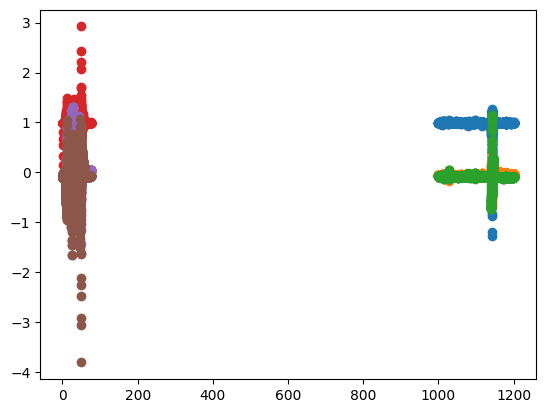

In [10]:
start_time = [1000,0]
end_time = [1200,75]
i=0
for name,df in logs.items():
    df = logs[name]
    def convert_to_elapsed_time(df):
        df['elapsed_time'] = (df.index - df.index[0]).total_seconds()
        return df
    df = convert_to_elapsed_time(df)
    # Set the start and end elapsed time values you want to extract

    # Filter the DataFrame based on the elapsed_time column
    filtered_df = df[(df['elapsed_time'] >= start_time[i]) & (df['elapsed_time'] <= end_time[i])]
    filtered_df['evelogger_vectornav_velocity'] = np.sqrt(filtered_df['evelogger_vectornav_v_n']**2+filtered_df['evelogger_vectornav_v_e']**2)
    filtered_df['evelogger_vectornav_accelX'] = filtered_df['evelogger_vectornav_accelX']/9.81
    filtered_df['evelogger_vectornav_accelY'] = filtered_df['evelogger_vectornav_accelY']/9.81
    filtered_df['evelogger_vectornav_accelZ'] = filtered_df['evelogger_vectornav_accelZ']/9.81
    plt.scatter(filtered_df['elapsed_time'],filtered_df['evelogger_vectornav_accelX'],label=f'accelX')
    plt.scatter(filtered_df['elapsed_time'],filtered_df['evelogger_vectornav_accelY'],label=f'accelY')
    # plt.scatter(filtered_df['evelogger_vectornav_accelX'],filtered_df['evelogger_vectornav_accelY'],label=f'accelY')
    plt.scatter(filtered_df['elapsed_time'],filtered_df['evelogger_vectornav_accelZ'],label=f'accelZ')
    for col in list(filtered_df):
        if ('temp' in col) or ('Digital' in col) or ('Buffer' in col) or ('Analog_Input' in col) or ("Diag" in col) or ("Reference_Voltage" in col):
            filtered_df.drop(col, axis=1, inplace=True)
    # Save the filtered DataFrame to a new CSV file
    filtered_df.to_csv('filtered'+name, index=False)
    i+=1





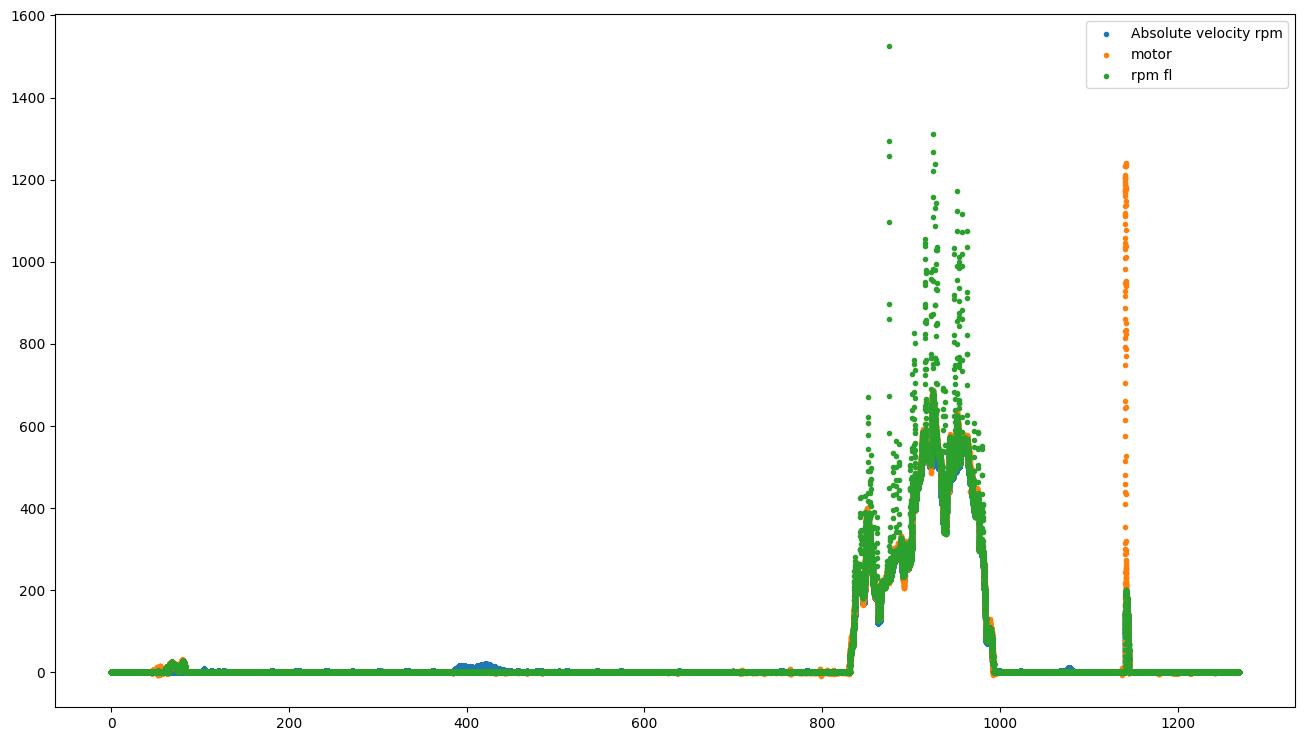

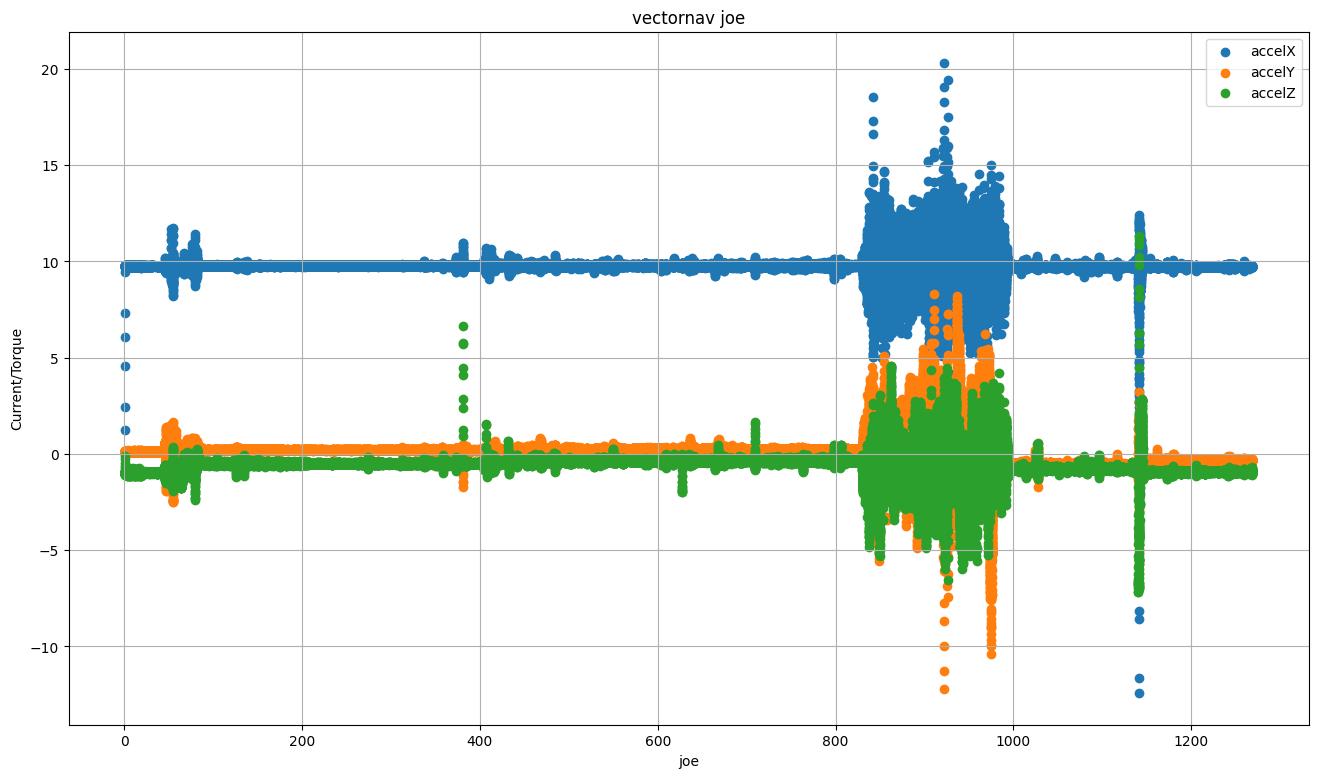

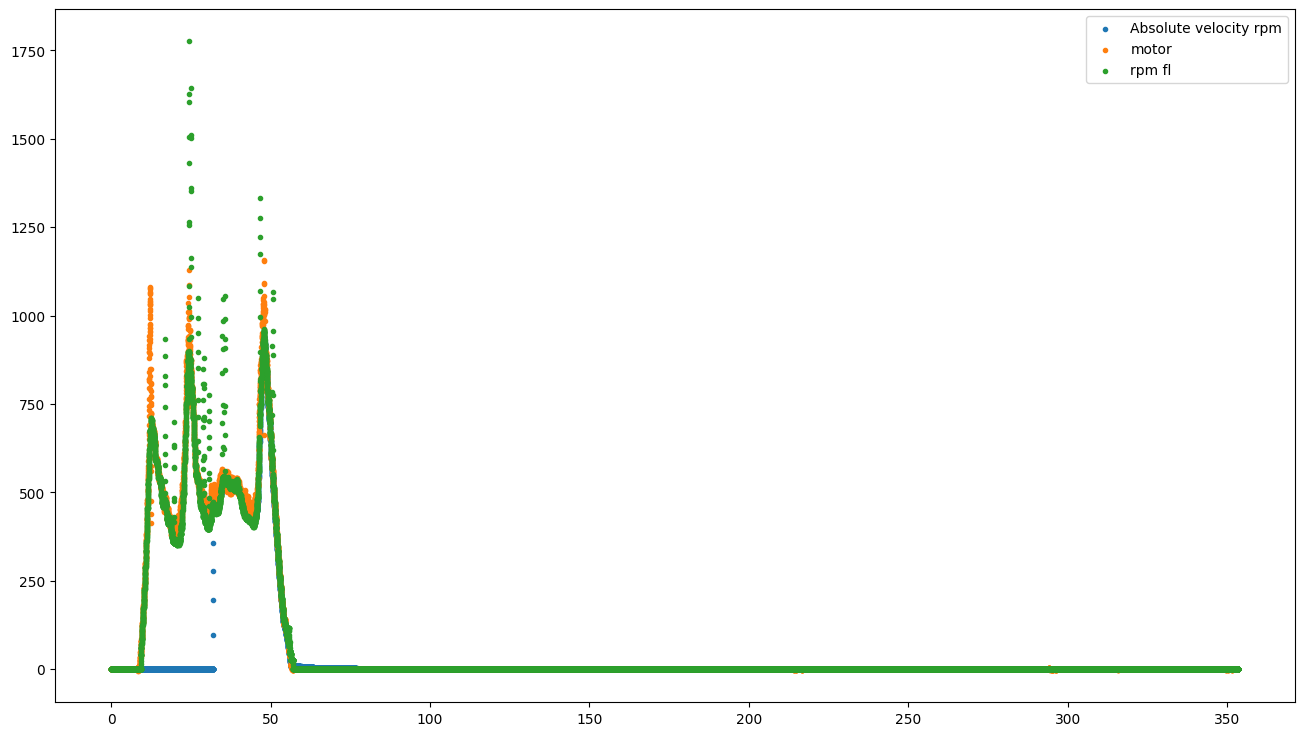

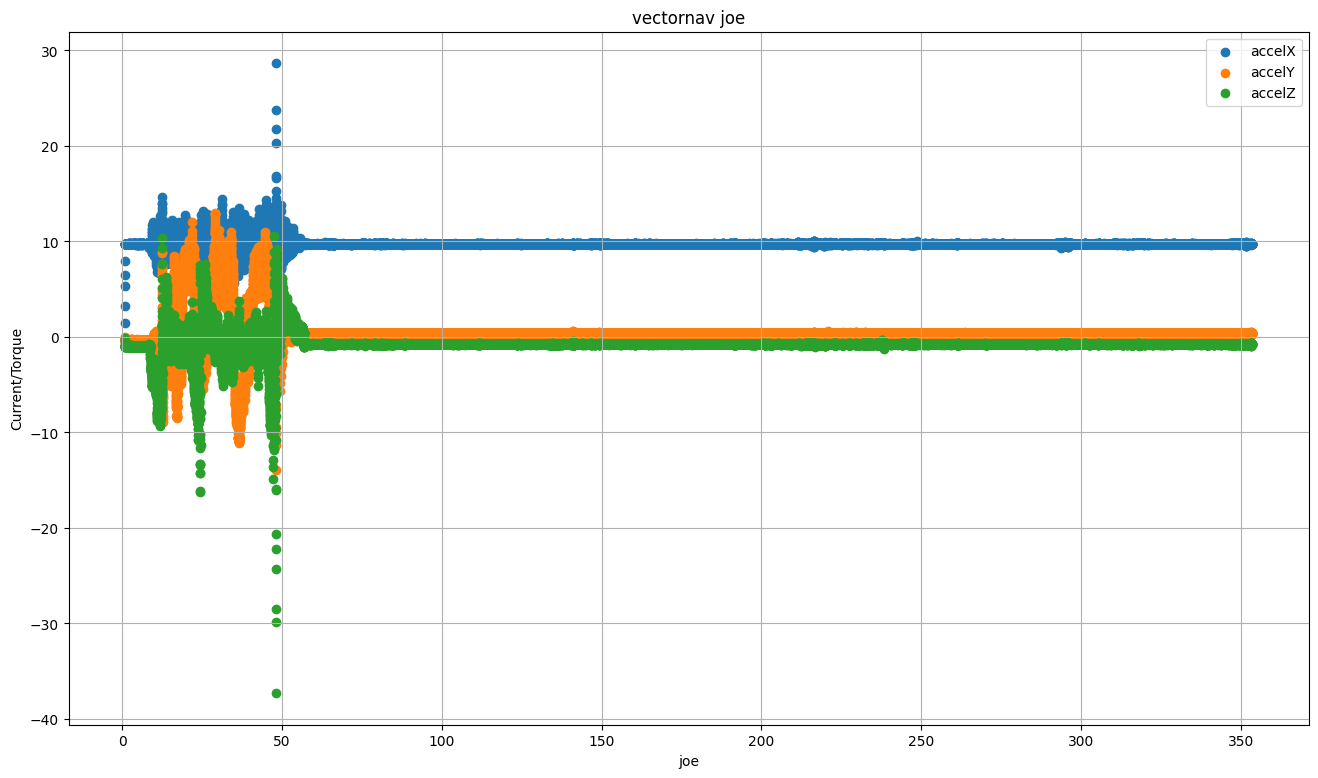

In [11]:

import numpy as np
for name,df in logs.items():
    df = logs[name]
    def convert_to_elapsed_time(df):
        df['elapsed_time'] = (df.index - df.index[0]).total_seconds()
        return df
    df = convert_to_elapsed_time(df)
    xlim = (df['elapsed_time'].max()-129,df['elapsed_time'].max()-125.5)
    
    plt.figure(figsize=(16,9))
    plt.scatter(df['elapsed_time'],np.sqrt(df['evelogger_vectornav_v_n']**2+df['evelogger_vectornav_v_e']**2)/(3.14*2*0.229)*60,label='Absolute velocity rpm',marker='.')
    plt.scatter(df['elapsed_time'],df['D2_Motor_Speed']/(3),label='motor',marker='.')
    plt.scatter(df['elapsed_time'],df['vcu_rpm_front_left'],label='rpm fl',marker='.')
    plt.legend()
    
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.scatter(df['elapsed_time'],df['evelogger_vectornav_accelX'],label=f'accelX')
    plt.scatter(df['elapsed_time'],df['evelogger_vectornav_accelY'],label=f'accelY')
    # plt.scatter(df['evelogger_vectornav_accelX'],df['evelogger_vectornav_accelY'],label=f'accelY')
    plt.scatter(df['elapsed_time'],df['evelogger_vectornav_accelZ'],label=f'accelZ')
    plt.grid(True)
    plt.xlabel("joe")
    plt.legend()
    plt.ylabel("Current/Torque")
    plt.title("vectornav joe")
    plt.show()


C:\Users\Matthew Samson\AppData\Local\Temp\ipykernel_26944\2828470104.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1140.8500000000001, 1141.95)


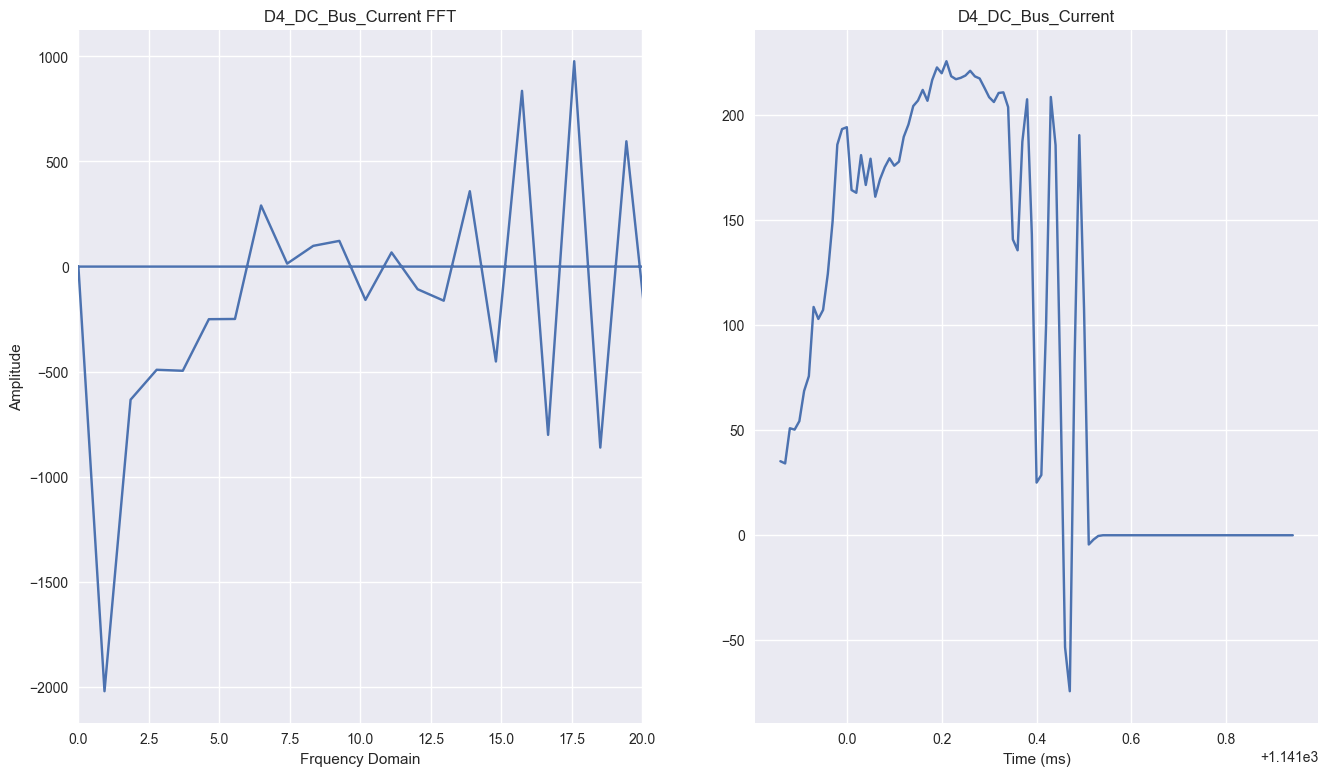

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


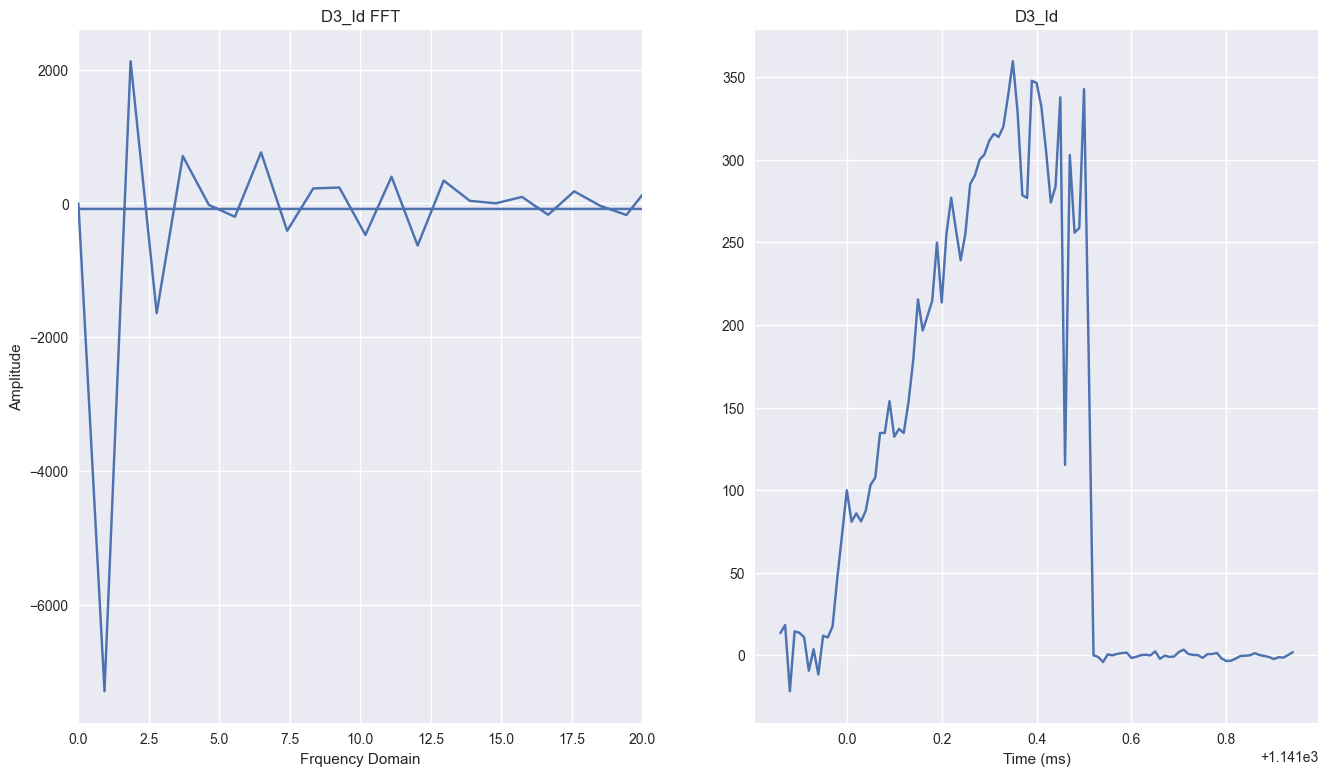

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


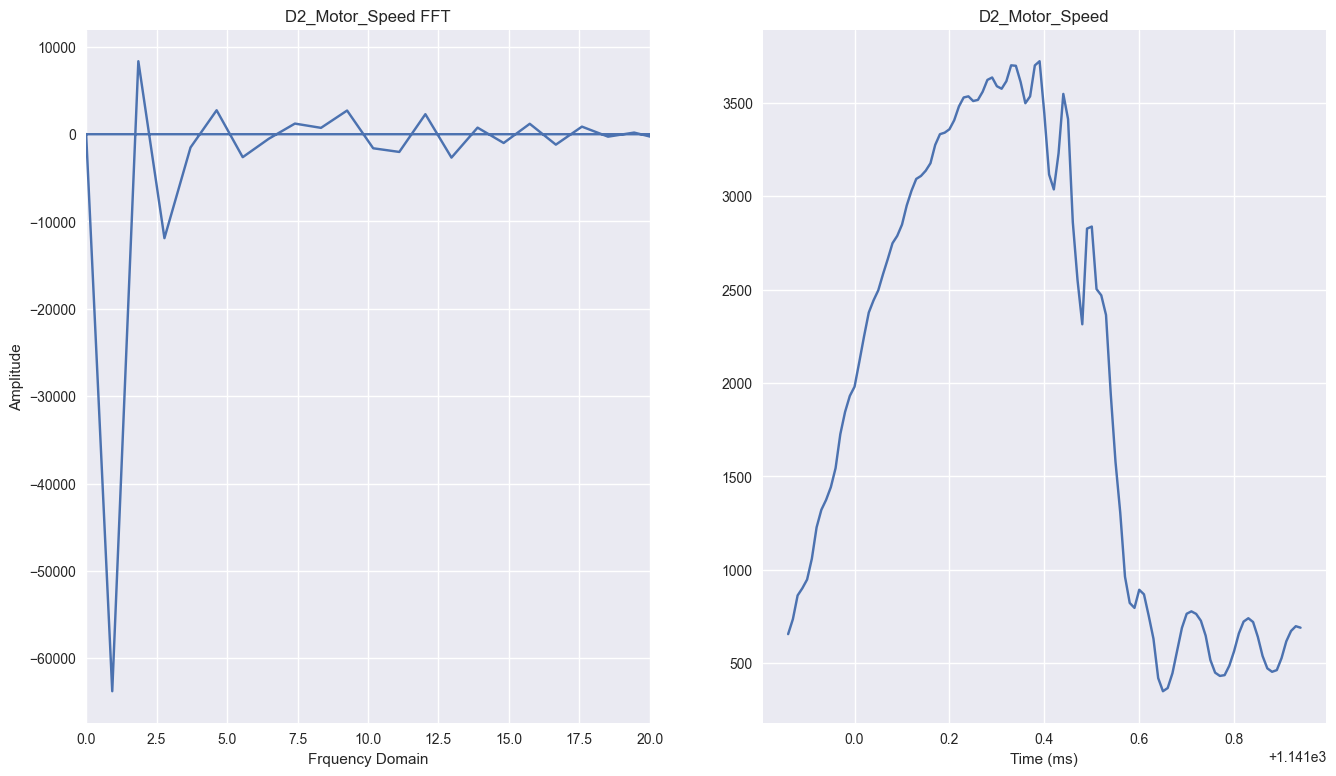

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


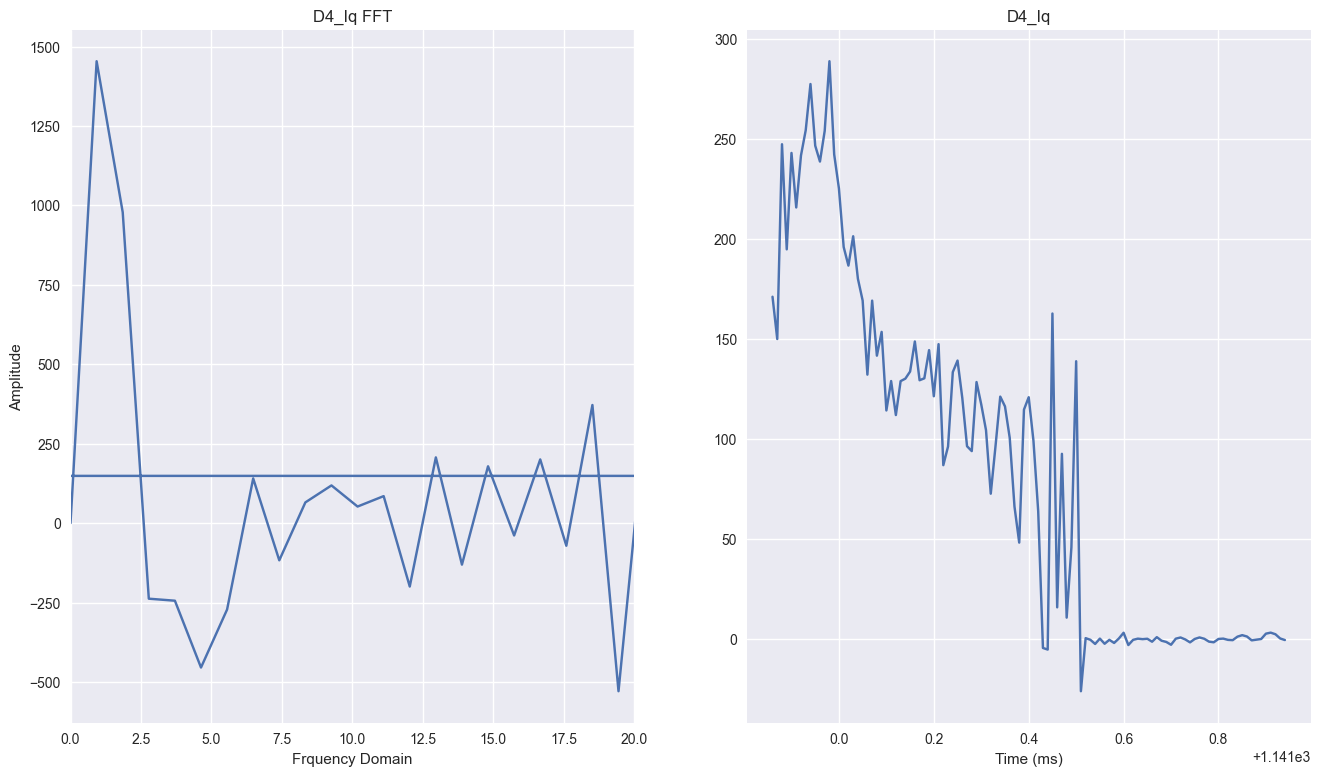

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


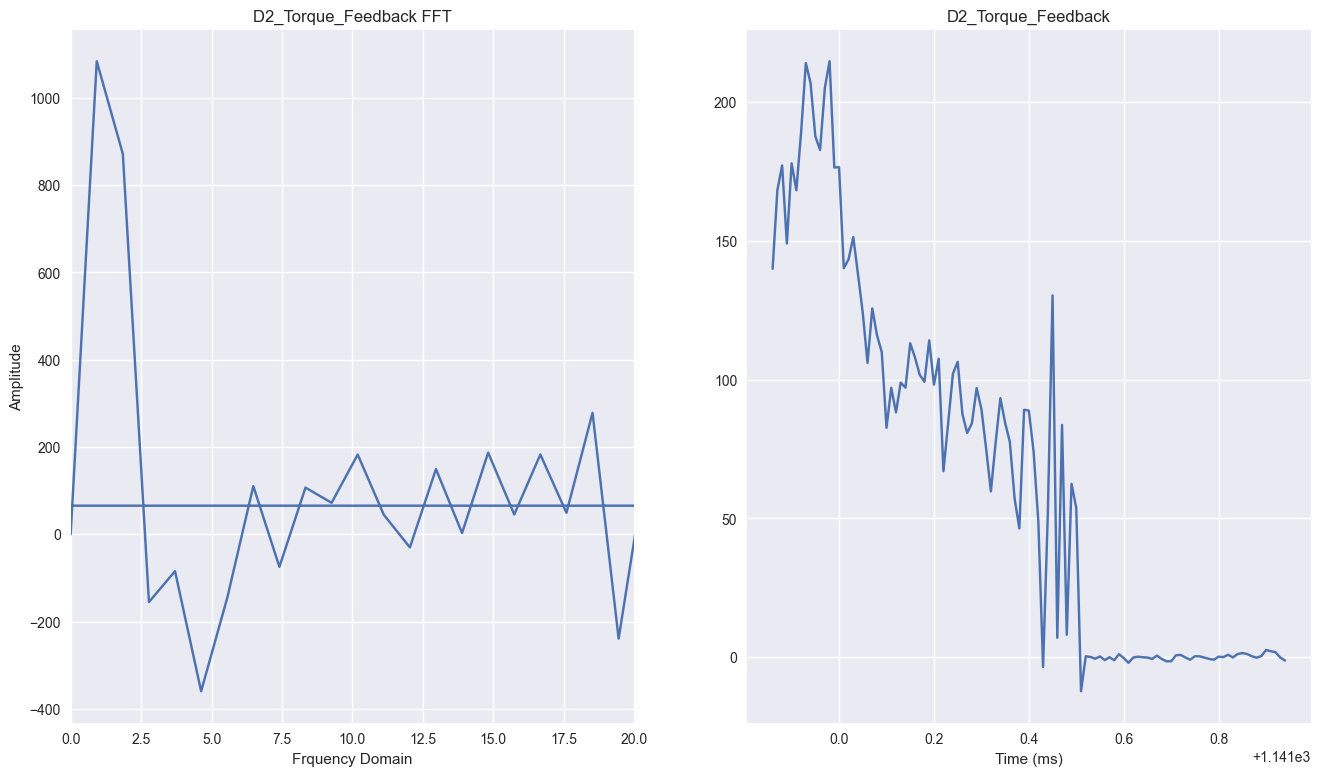

(11.88, 12.98)


c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


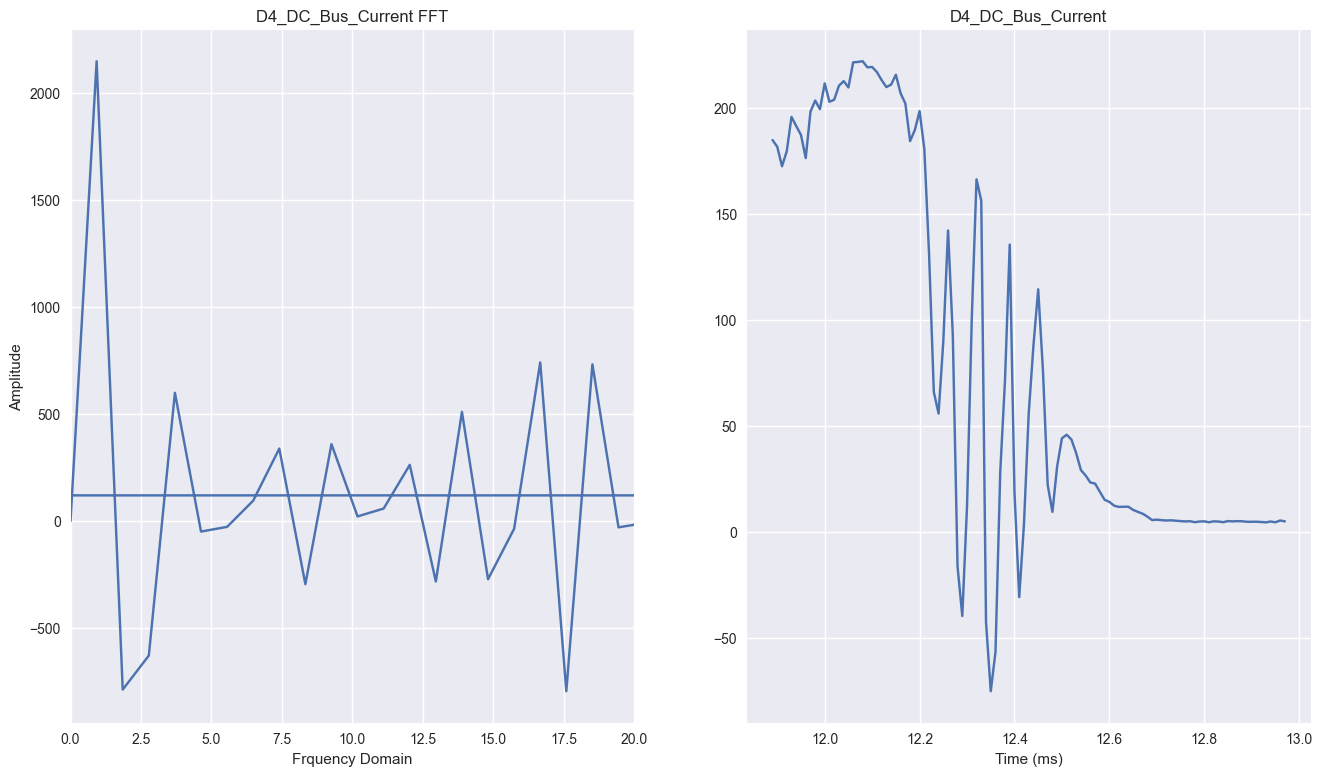

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


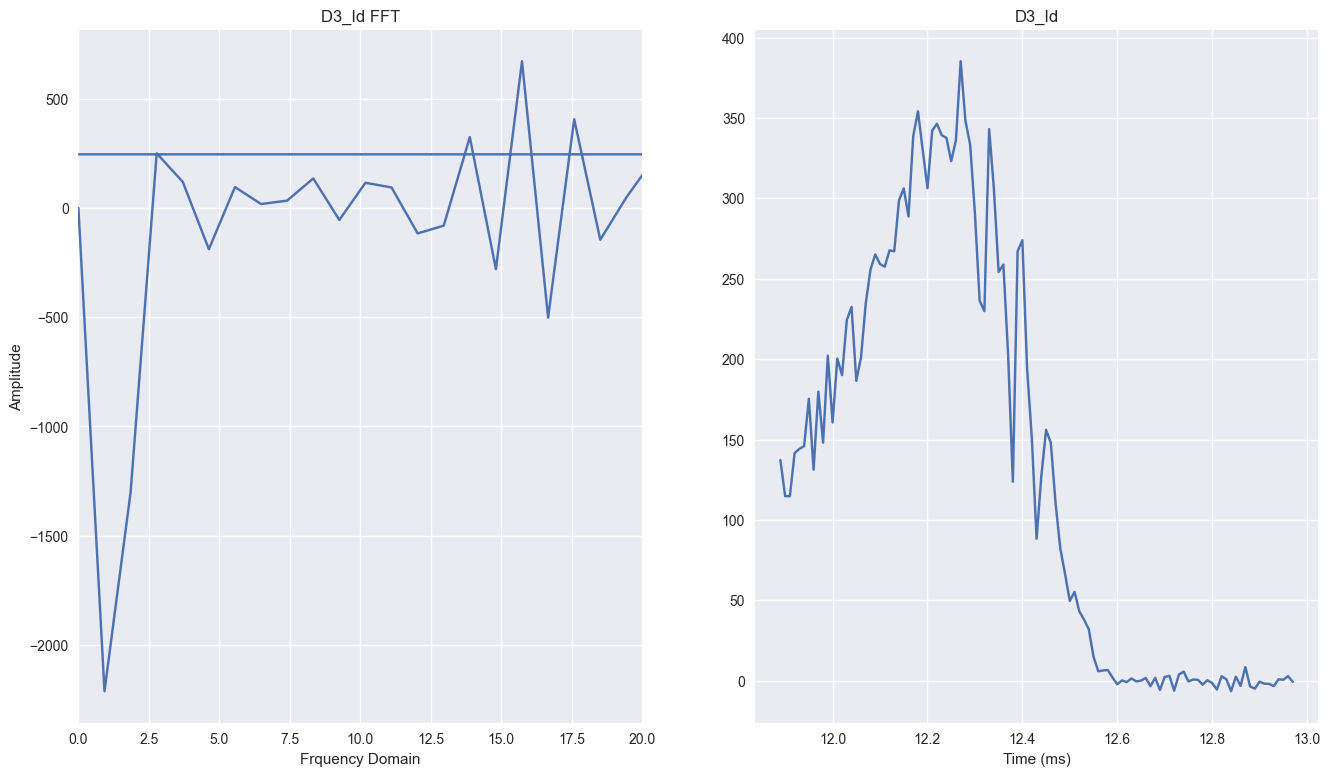

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


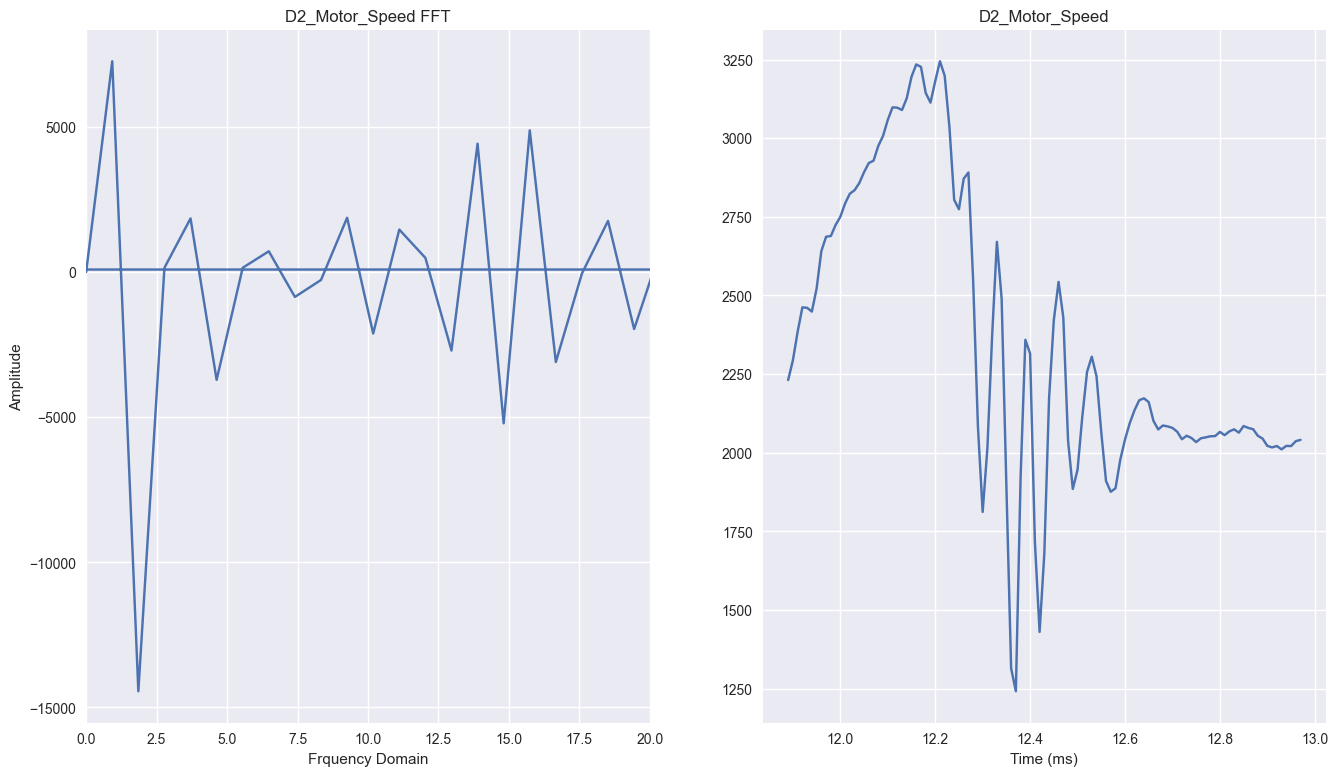

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


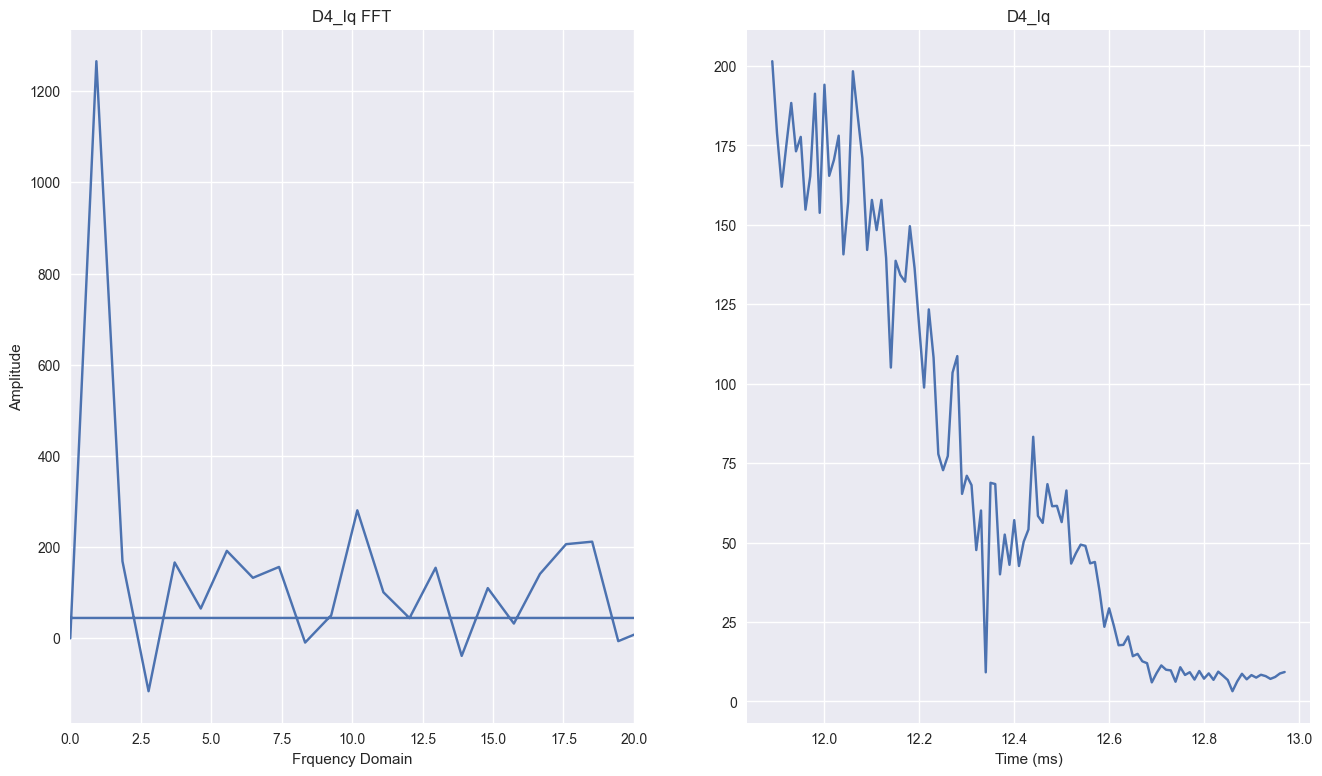

c:\Users\Matthew Samson\source\repos\python-data-analysis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


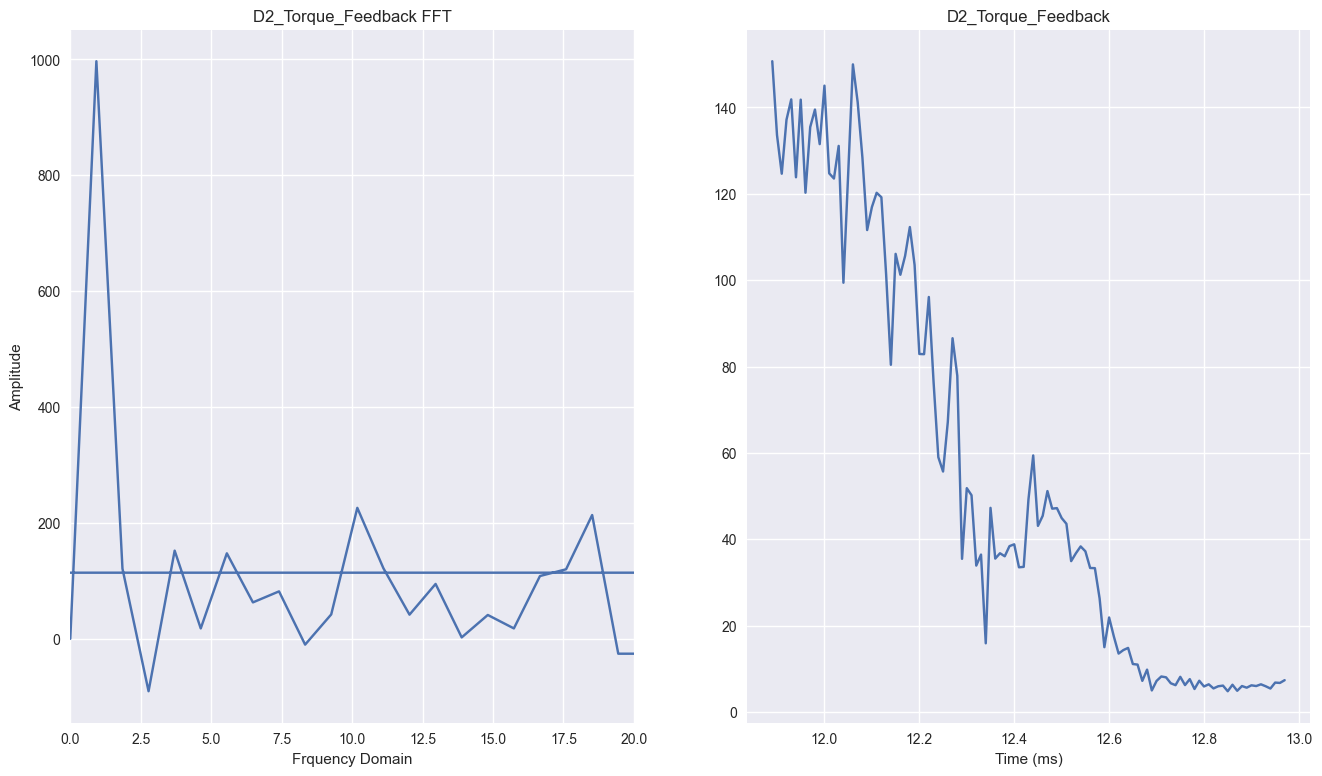

In [12]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.fft import fftfreq 
plt.style.use("seaborn")

for name,df in logs.items():
    max_torque_index = df['D1_Commanded_Torque'].idxmax()
    xlim = (df['elapsed_time'][max_torque_index]-.1,df['elapsed_time'][max_torque_index]+1)
    print(xlim)
    for col in ['D4_DC_Bus_Current','D3_Id','D2_Motor_Speed','D4_Iq','D2_Torque_Feedback']:
        t = df["elapsed_time"].loc[df["elapsed_time"] > xlim[0]].loc[df["elapsed_time"] < xlim[1]]
        s = df[col].loc[df["elapsed_time"] > xlim[0]].loc[df["elapsed_time"] < xlim[1]]

        fft = np.fft.fft(s)
        fft[0] = 0
        fftfreq = np.fft.fftfreq(len(s))*len(s)/(t.max()-t.min())
        plt.figure(figsize=(16,9))
        plt.subplot(1, 2, 1)
        plt.xlabel("Frquency Domain")
        plt.ylabel("Amplitude")
        plt.title(col+ " FFT")
        # plt.grid(True)
        # plt.ylim((0,2500))
        # plt.xscale('log')
        plt.xlim((0,20))

        plt.plot(fftfreq, fft)
        plt.subplot(1, 2, 2)
        plt.plot(t, s)
        plt.title(col)
        plt.xlabel("Time (ms)")

        plt.show()

In [13]:
import plotly.express as px
import pandas as pd

for name,df in logs.items():

    # df.dropna(
    #     axis=0,
    #     how='any',
    #     thresh=None,
    #     subset=None,
    #     inplace=True
    # )

    color_scale = [(0, 'orange'), (1,'red')]

    fig = px.scatter_mapbox(df, 
                            lat="evelogger_vectornav_latitude", 
                            lon="evelogger_vectornav_longitude", 
                            color_continuous_scale=color_scale,
                            zoom=8, 
                            height=800,
                            width=800)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    break

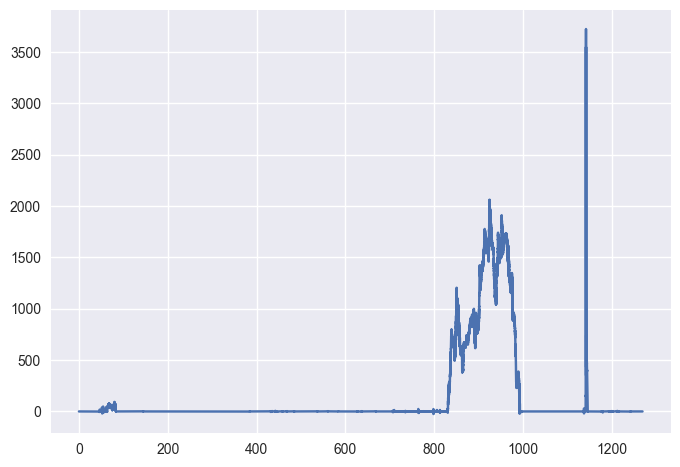

In [14]:
plt.plot(df['elapsed_time'],df['D2_Motor_Speed'])

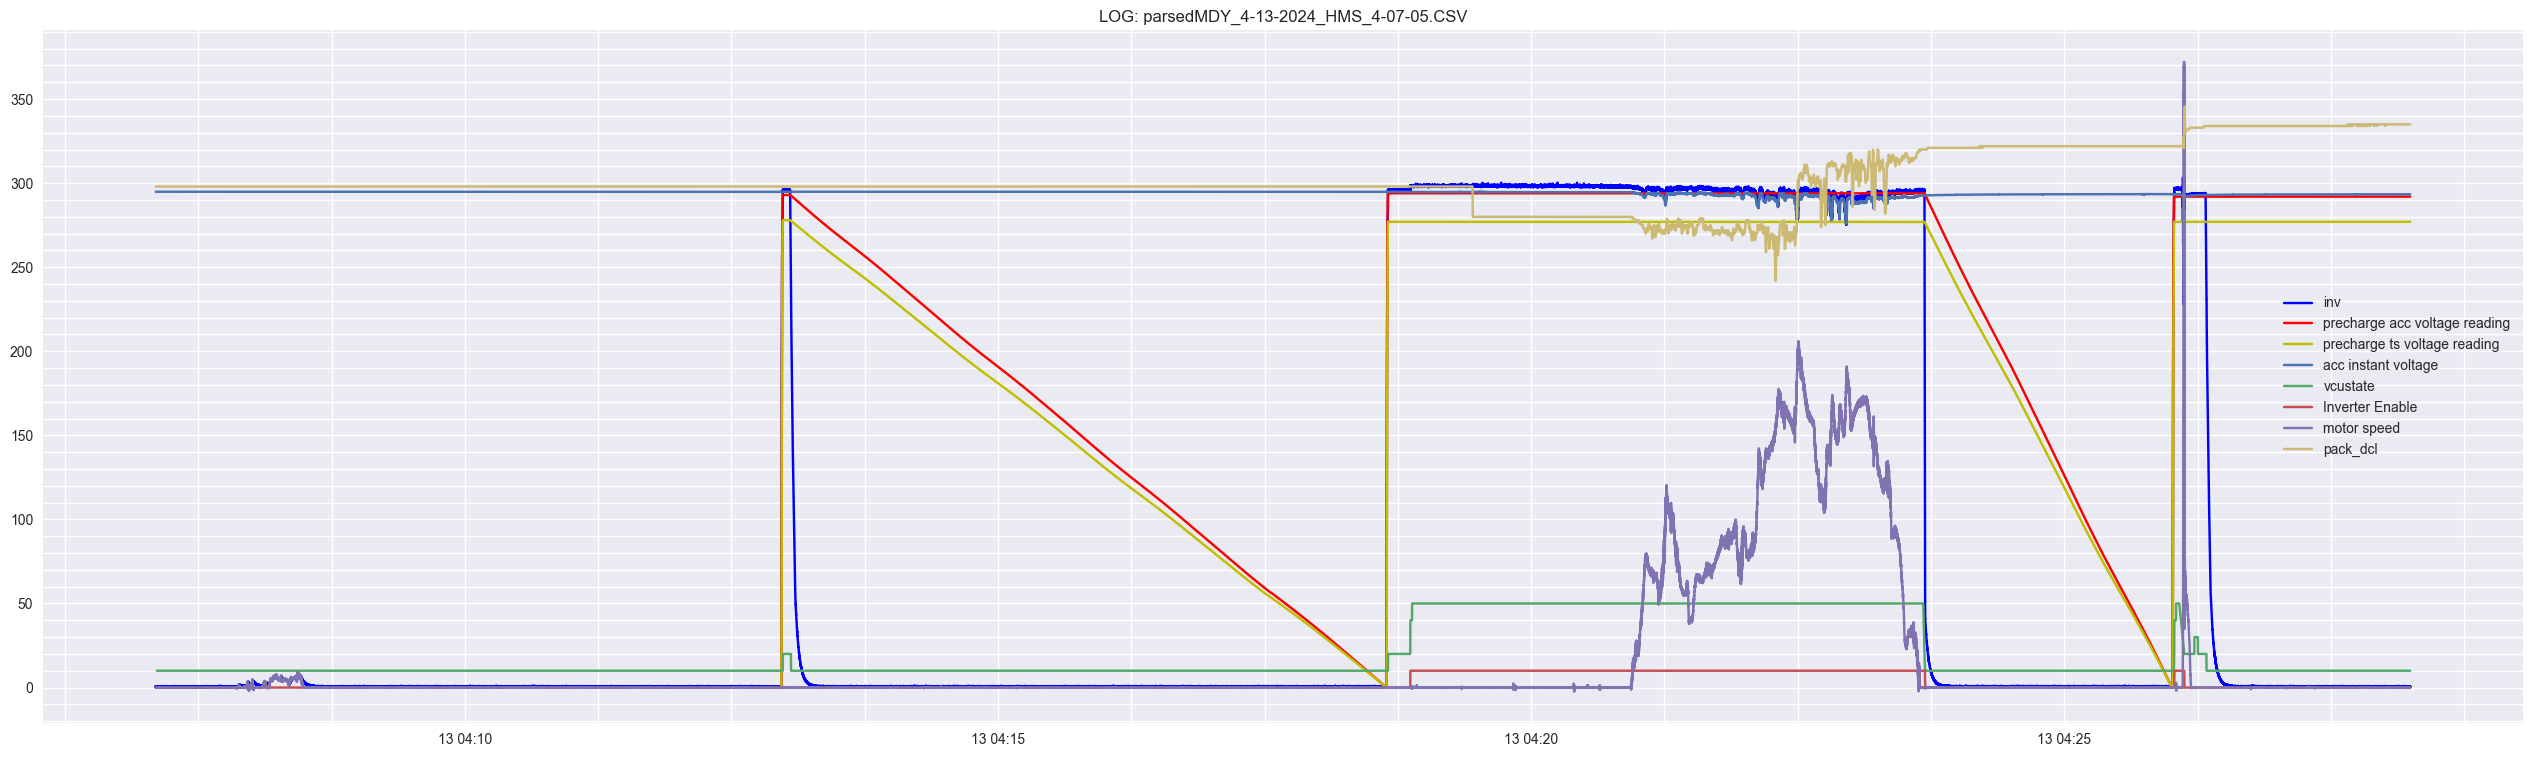

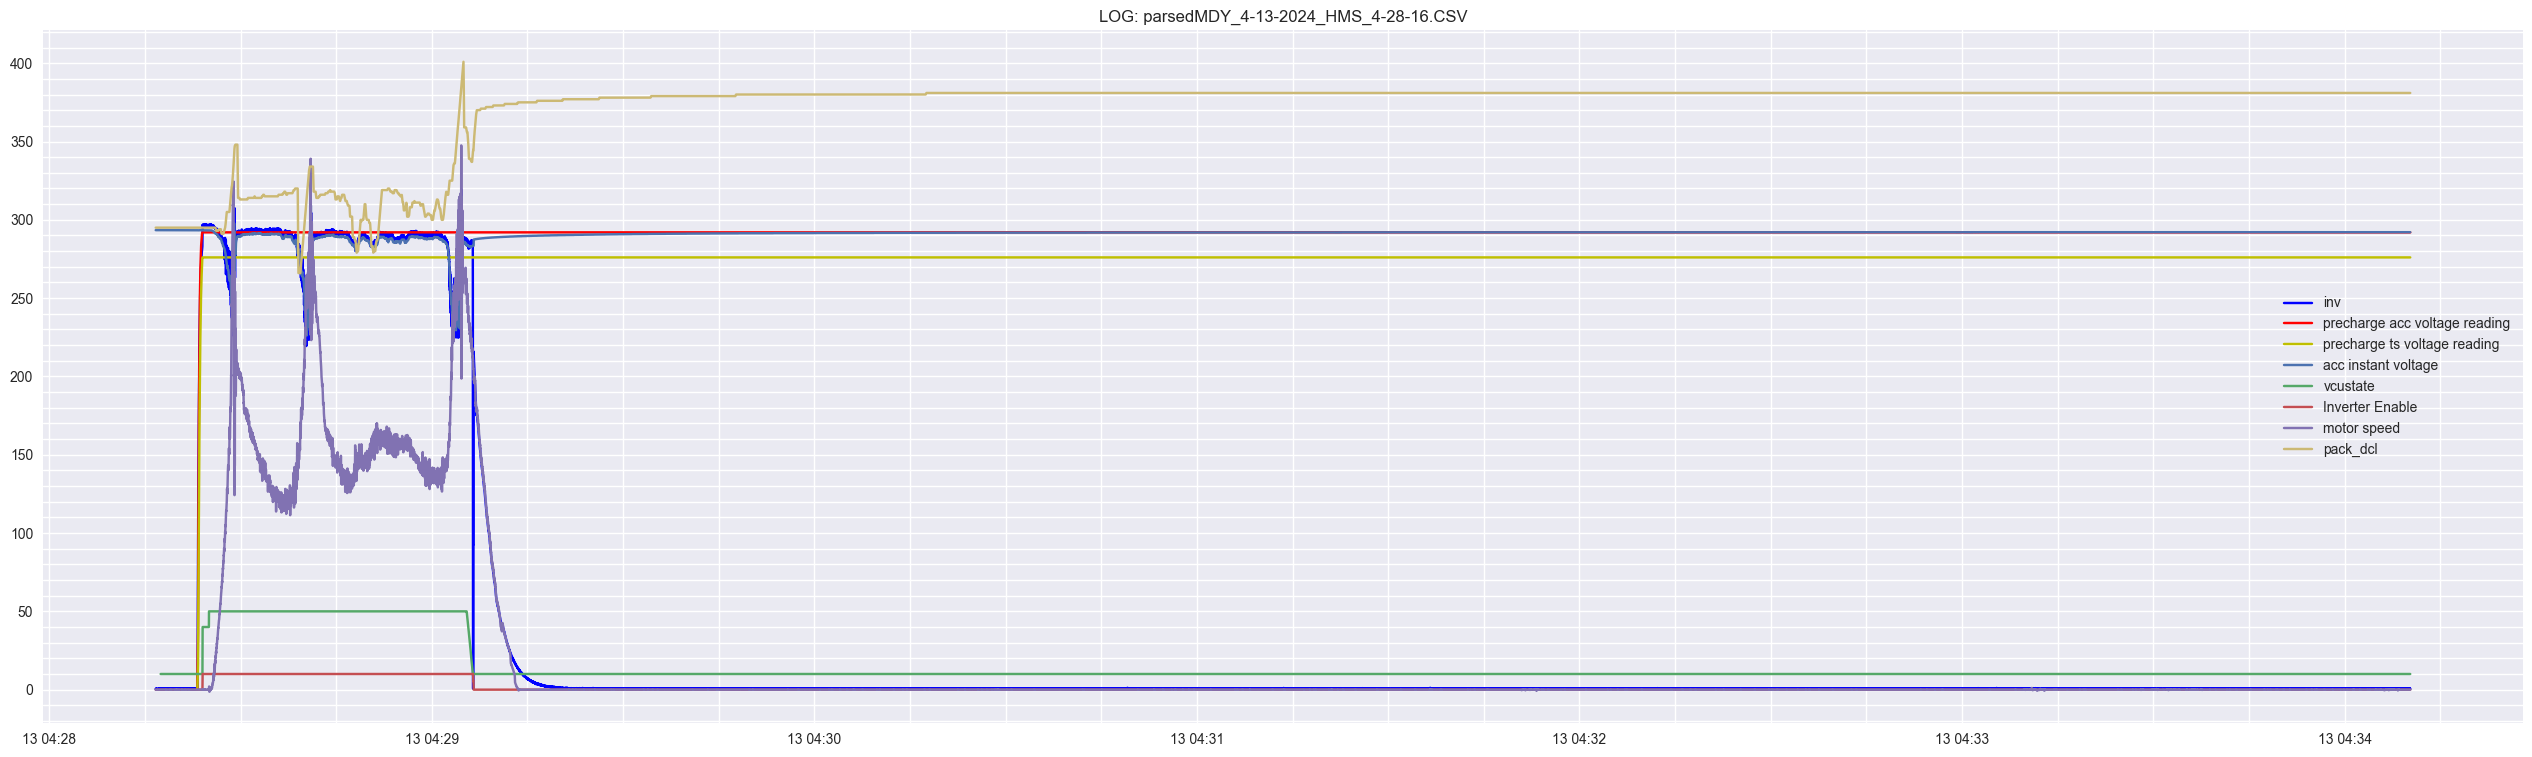

In [15]:
for name,df in logs.items():
    try:
        plt.figure(figsize=(32,9))
        # plt.axes().yaxis.set_minor_locator(ticker.AutoMinorLocator)
        plt.title(f"LOG: {name}")
        plt.plot(df.index,df['D1_DC_Bus_Voltage'],label='inv',color='b')
        plt.plot(df.index,df['precharge_accVoltageMod100']+(df['precharge_accVoltageDiv100']*100),label='precharge acc voltage reading',color='r')
        plt.plot(df.index,df['precharge_tsVoltageMod100']+(df['precharge_tsVoltageDiv100']*100),label='precharge ts voltage reading',color='y')
        plt.plot(df.index,df['Pack_Inst_Voltage'],label='acc instant voltage')
        plt.plot(df.index,df["VCU_STATEMACHINE_STATE"]*10,label='vcustate')
        plt.plot(df.index,df['D6_Inverter_Enable_State']*10,label='Inverter Enable')
        plt.plot(df.index,df['D2_Motor_Speed']/10,label='motor speed')
        plt.plot(df.index,df['Pack_DCL'],label='pack_dcl')
        # plt.yaxis.set_minor_locator(ticker.MultipleLocator(10))
        plt.minorticks_on()
        plt.grid(True,which='minor')
        plt.legend()    
        plt.show()
    except:
        continue


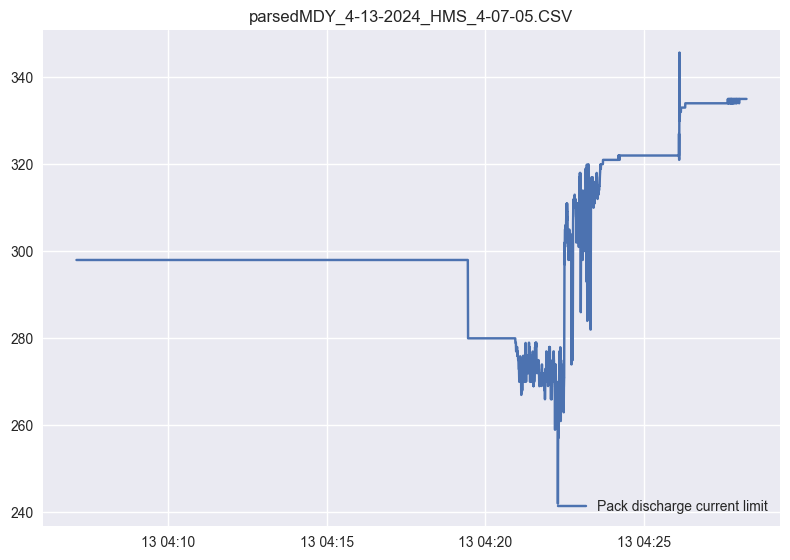

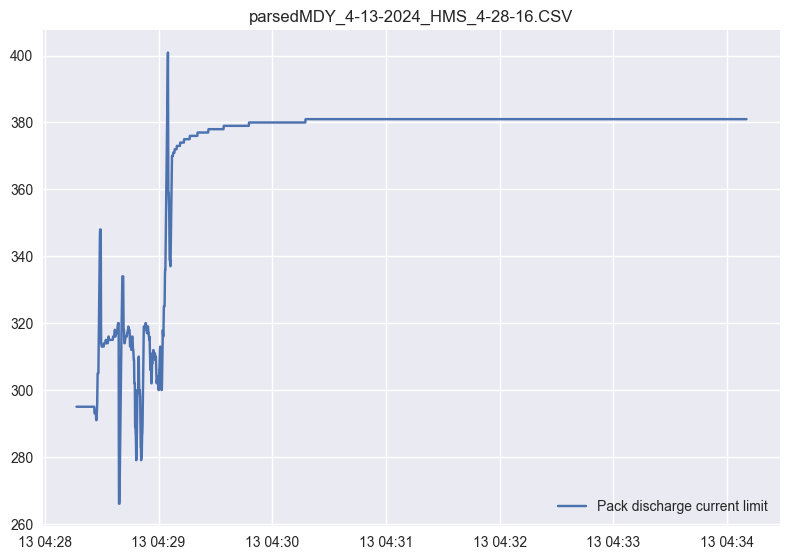

In [16]:
for name,df in logs.items():
    run_fault_lo = df['D3_Run_Fault_Lo']
    run_fault_hi = df['D4_Run_Fault_Hi']

    # plt.plot(df.index,run_fault_hi,color='r',label='Run Fault Lo')
    # plt.plot(df.index,run_fault_lo,color='g',label='Run Fault Hi')
    # plt.plot(df.index,df['acu_bms_gpio_state'],label='acu bms gpio state')
    plt.plot(df.index,df['Pack_DCL'],label='Pack discharge current limit')

    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



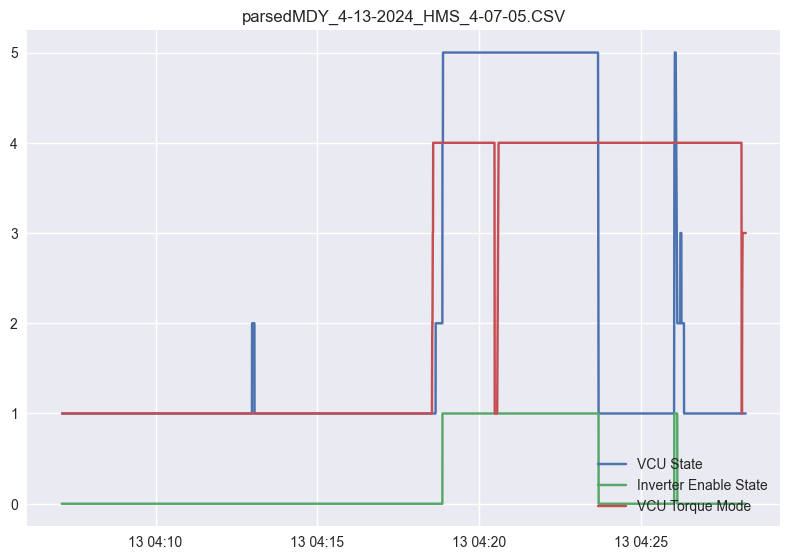

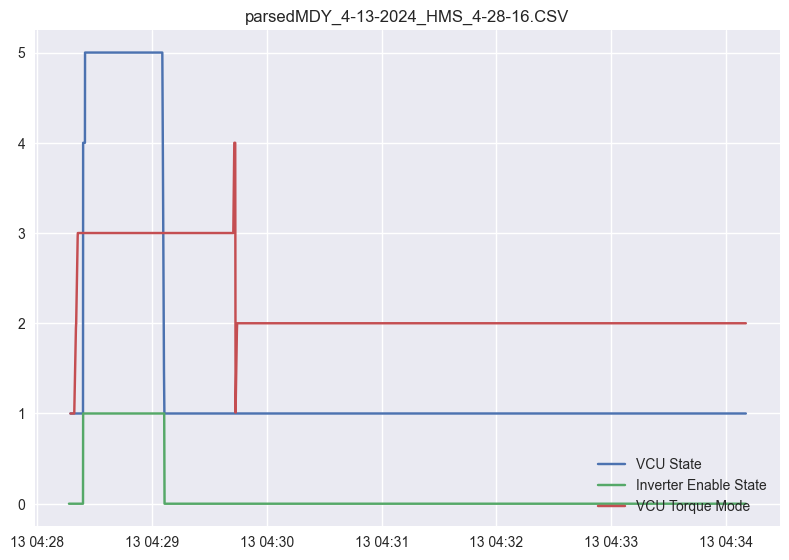

In [17]:
for name,df in logs.items():
    vcu_state = df['VCU_STATEMACHINE_STATE']
    inv_en_state = df['D6_Inverter_Enable_State']
    vcu_torque_mode = df['VCU_TORQUE_MODE']
    vcu_max_torque = df['VCU_MAX_TORQUE']
    vcu_thingy = df['VCU_ACTIVATE_BUZZER']
    
    plt.plot(df.index,vcu_state,label='VCU State')
    plt.plot(df.index,inv_en_state,label='Inverter Enable State')
    plt.plot(df.index,vcu_torque_mode,label='VCU Torque Mode')
    # plt.plot(df.index,vcu_max_torque,label='vcu_max_torque')
    # plt.plot(df.index,vcu_thingy,label='Buzzer')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



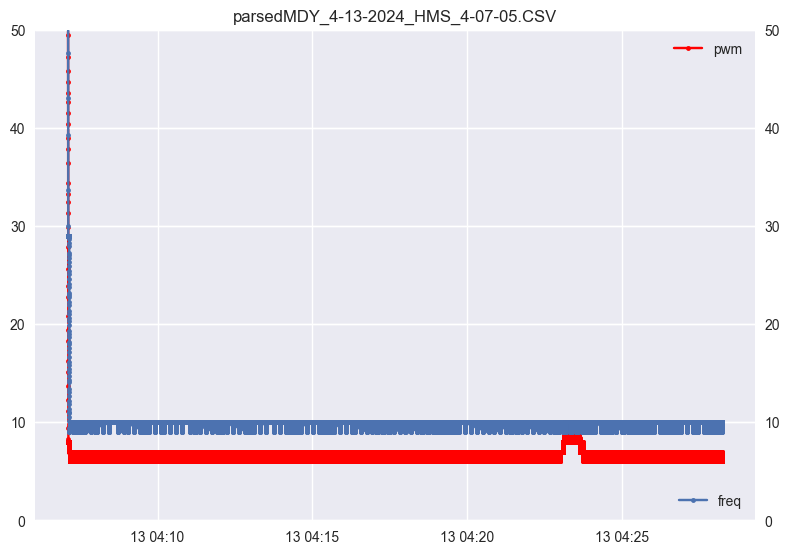

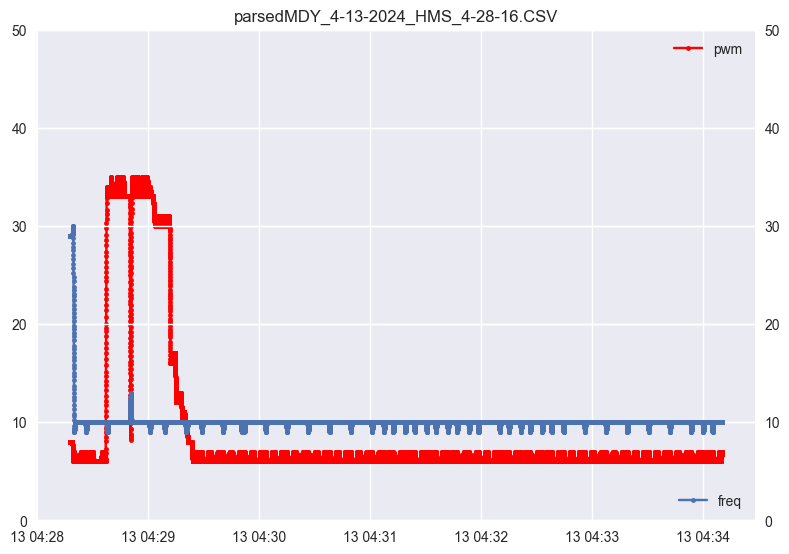

In [18]:
for name,df in logs.items():
    fig, ax = plt.subplots()
    ax.plot(df.index,df['acu_imd_pwm_duty'],marker='.',color='r',label='pwm')
    ax1 = ax.twinx()
    ax1.plot(df.index,df['acu_imd_pwm_frequency'],marker='.',label='freq')
    ax.set_ylim((0,50))
    ax1.legend()
    ax.legend()
    ax1.set_ylim((0,50))
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title(name)
    plt.show()



In [19]:
# list[log]

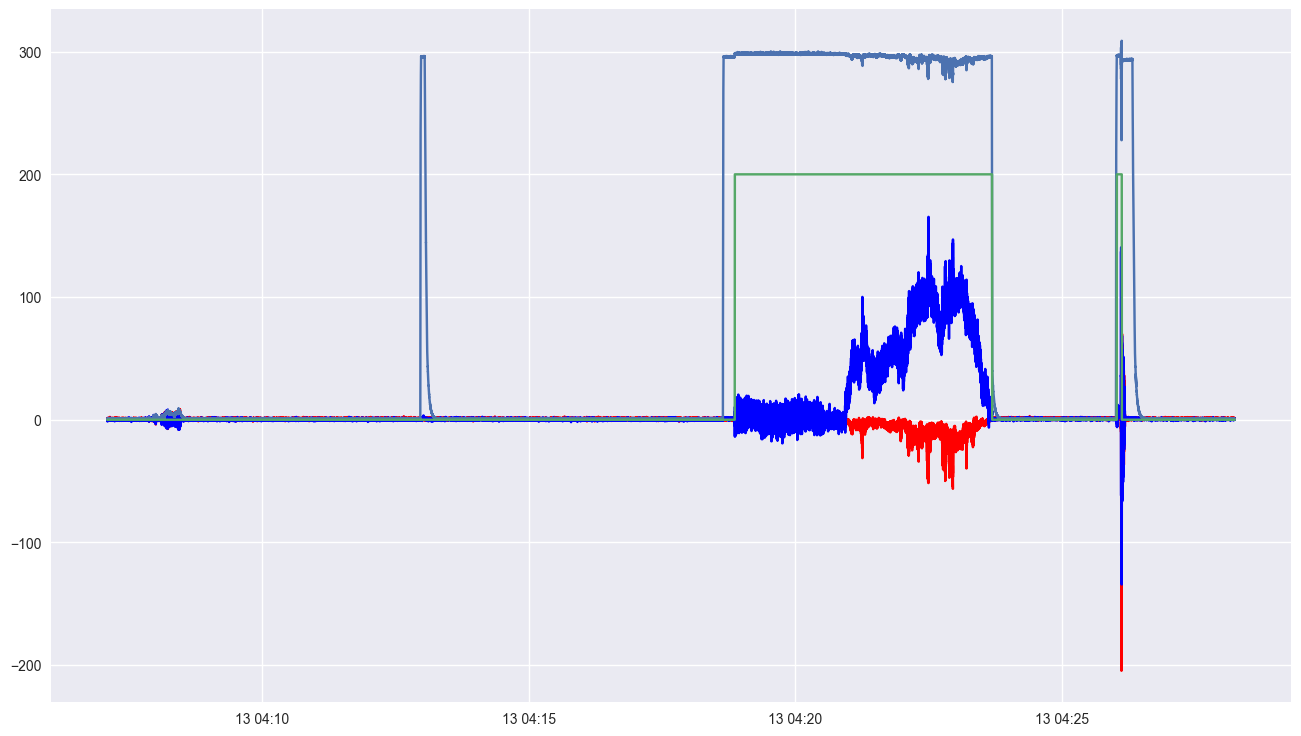

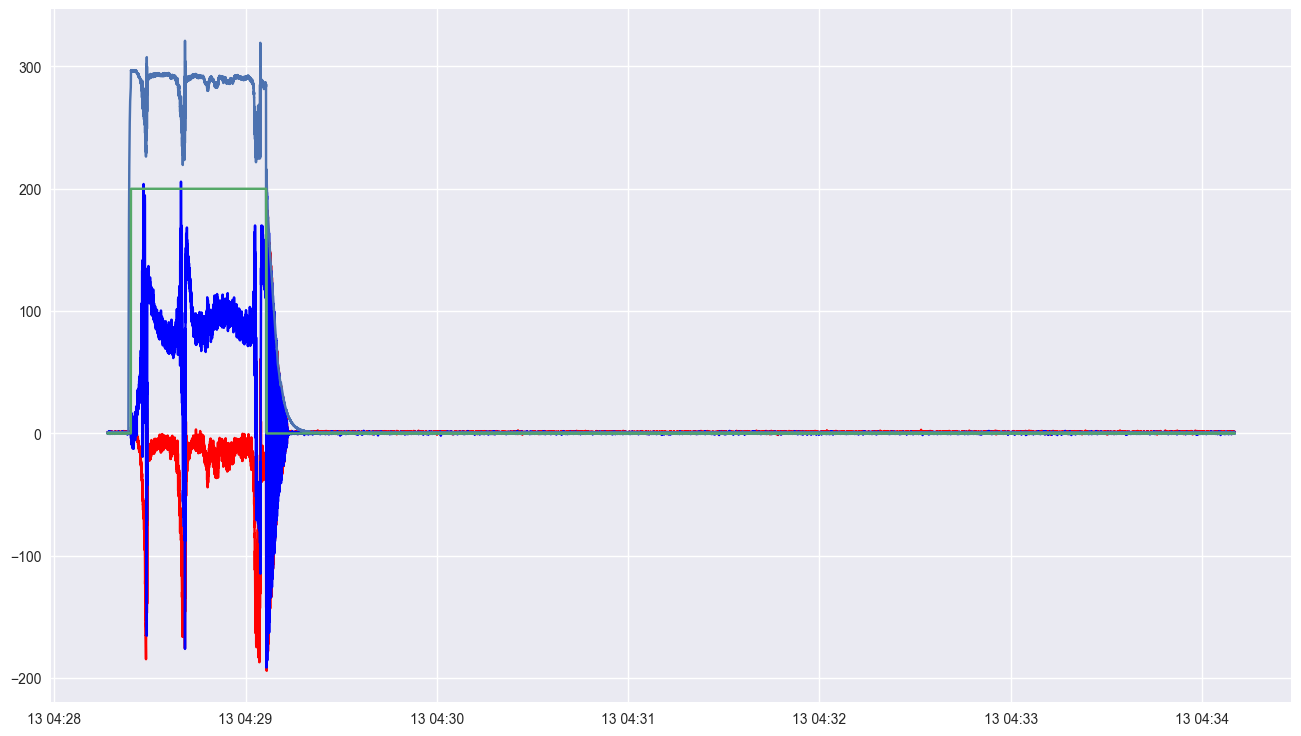

In [20]:
for name,df in logs.items():
    fig = plt.figure(figsize=(16,9))
    plt.plot(df.index,df['D3_VAB_Vd_Voltage'],color='r')
    plt.plot(df.index,df['D4_VBC_Vq_Voltage'],color='b')
    plt.plot(df.index,df["D1_DC_Bus_Voltage"])
    plt.plot(df.index,df['D6_Inverter_Enable_State']*200)
    plt.show()



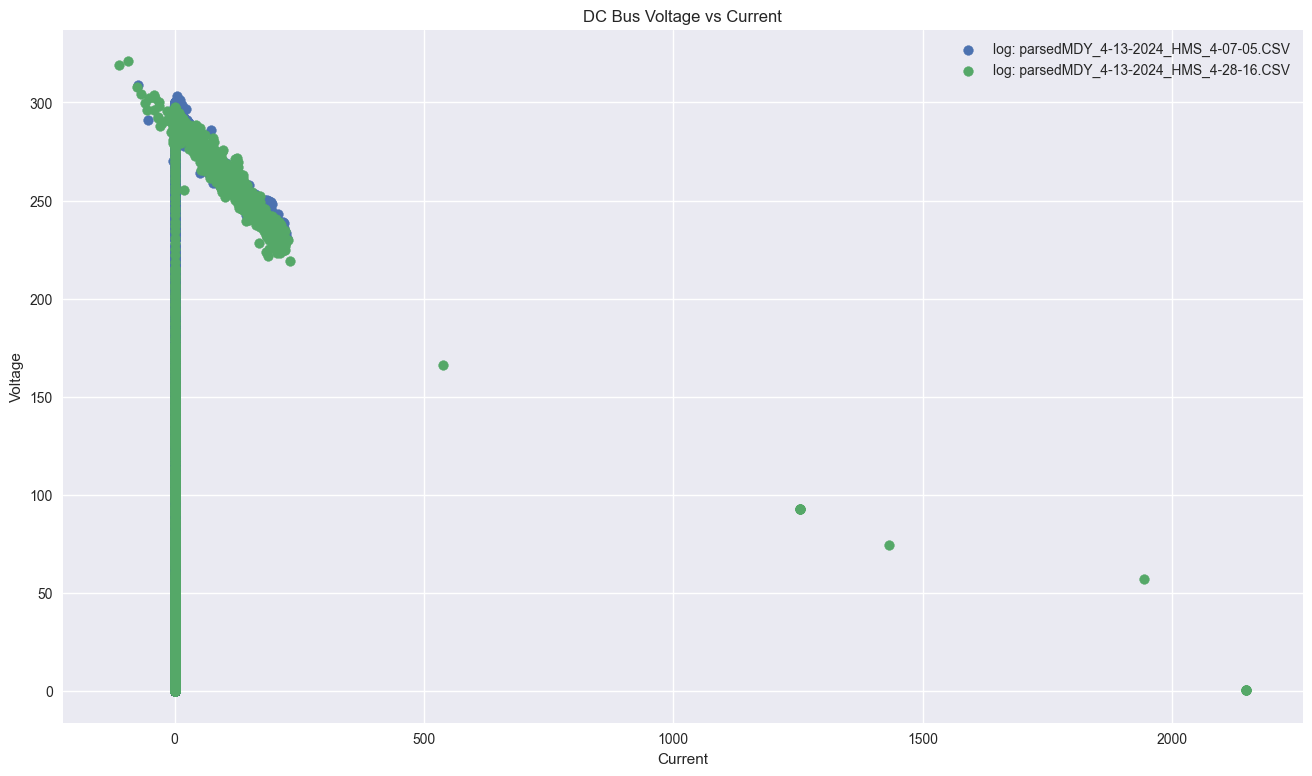

In [21]:
plt.figure(figsize=(16,9))

for name,df in logs.items():
    plt.scatter(df["D4_DC_Bus_Current"],df['D1_DC_Bus_Voltage'],label=f'log: {name}')
    # plt.scatter(df["D1_DC_Bus_Voltage"],df['D4_DC_Bus_Current'])
# plt.ylim((-10,400))
plt.grid(True)
plt.xlabel("Current")
plt.legend()
plt.ylabel("Voltage")
plt.title("DC Bus Voltage vs Current")
plt.show()


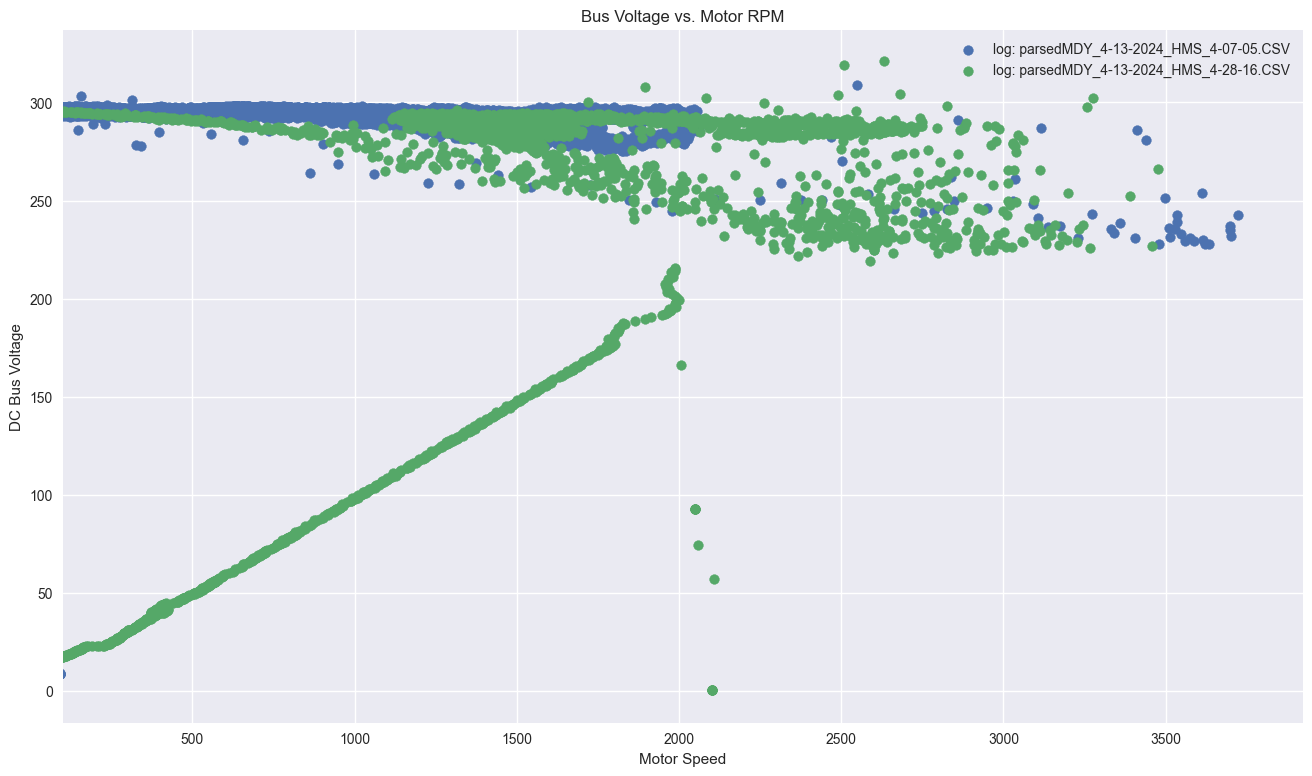

In [22]:
plt.figure(figsize=(16,9))
speed_max = 0
for name,df in logs.items():
    # plt.scatter(df['D1_DC_Bus_Voltage'],df['D2_Motor_Speed'])
    plt.scatter(df['D2_Motor_Speed'],df['D1_DC_Bus_Voltage'],label=f'log: {name}')
    if df['D2_Motor_Speed'].max() > speed_max:
        speed_max = df['D2_Motor_Speed'].max()
plt.xlabel("Motor Speed")
plt.ylabel("DC Bus Voltage")
plt.xlim((100,(speed_max+200)))
plt.grid(True)
plt.title("Bus Voltage vs. Motor RPM")
plt.legend()

In [23]:
for name,df in logs.items():
    print(list(df))

['D1_Analog_Input_1', 'D2_Analog_Input_2', 'D3_Analog_Input_3', 'D4_Analog_Input_4', 'D5_Analog_Input_5', 'D6_Analog_Input_6', 'D1_Digital_Input_1', 'D2_Digital_Input_2', 'D3_Digital_Input_3', 'D4_Digital_Input_4', 'D5_Digital_Input_5', 'D6_Digital_Input_6', 'D7_Digital_Input_7', 'D8_Digital_Input_8', 'D1_Motor_Angle_Electrical', 'D2_Motor_Speed', 'D3_Electrical_Output_Frequency', 'D4_Delta_Resolver_Filtered', 'D1_Post_Fault_Lo', 'D2_Post_Fault_Hi', 'D3_Run_Fault_Lo', 'D4_Run_Fault_Hi', 'D1_Modulation_Index', 'D2_Flux_Weakening_Output', 'D3_Id_Command', 'D4_Iq_Command', 'D1_Commanded_Torque', 'D2_Torque_Feedback', 'D3_Power_On_Timer', 'D1_Flux_Command', 'D2_Flux_Feedback', 'D3_Id', 'D4_Iq', 'D1_DC_Bus_Voltage', 'D2_Output_Voltage', 'D3_VAB_Vd_Voltage', 'D4_VBC_Vq_Voltage', 'D1_Phase_A_Current', 'D2_Phase_B_Current', 'D3_Phase_C_Current', 'D4_DC_Bus_Current', 'D1_VSM_State', 'D2_Inverter_State', 'D3_Relay_1_Status', 'D3_Relay_2_Status', 'D3_Relay_3_Status', 'D3_Relay_4_Status', 'D3_Rela

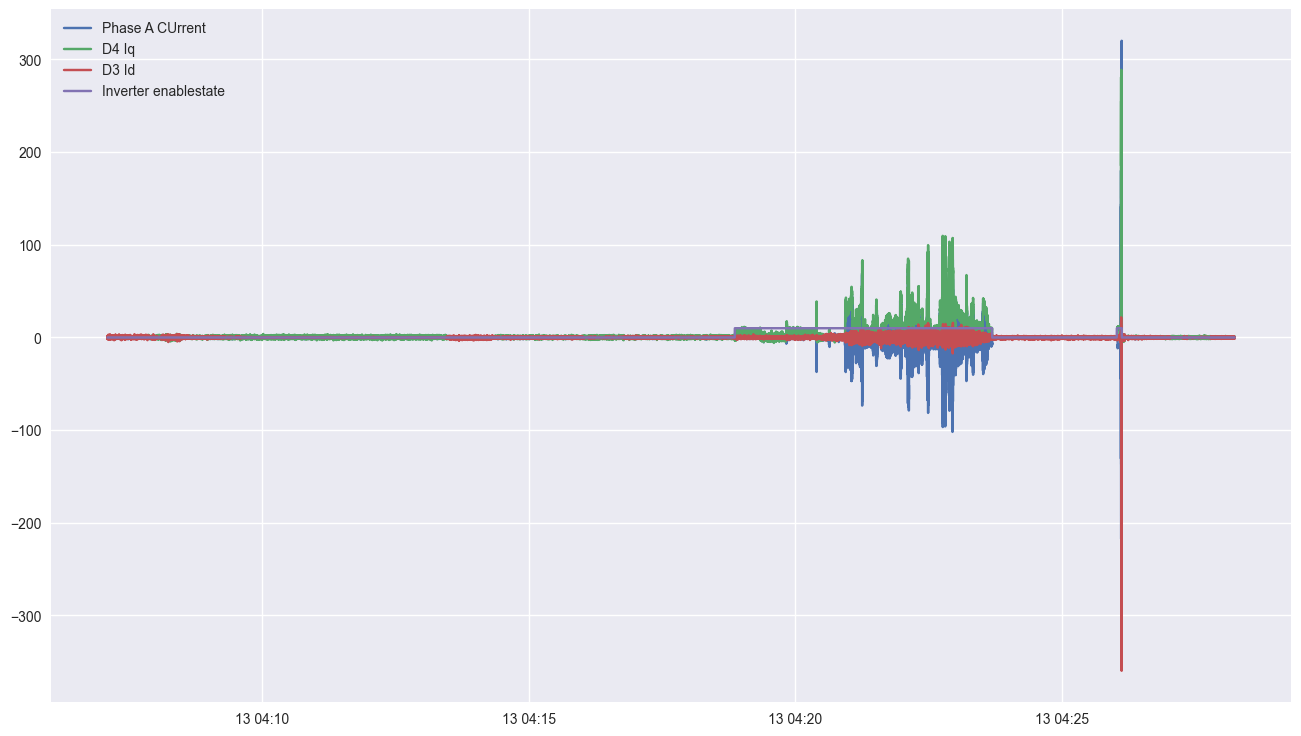

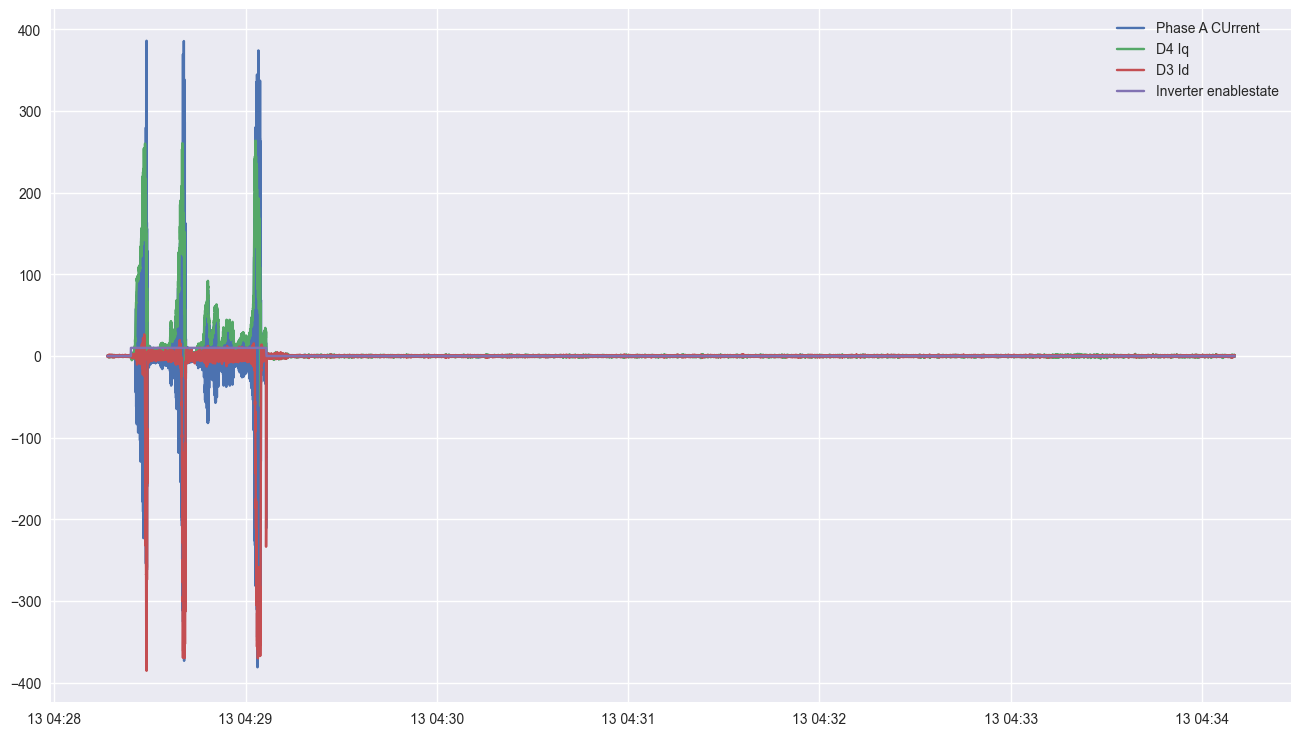

In [24]:

for name,df in logs.items():
    fig = plt.figure(figsize=(16,9))
    plt.plot(df.index,df['D1_Phase_A_Current'],label='Phase A CUrrent')
    plt.plot(df.index,df['D4_Iq'],label='D4 Iq')
    plt.plot(df.index,df['D3_Id']*-1,label='D3 Id')

    plt.plot(df.index,df['D6_Inverter_Enable_State']*10,label='Inverter enablestate')
    plt.legend()

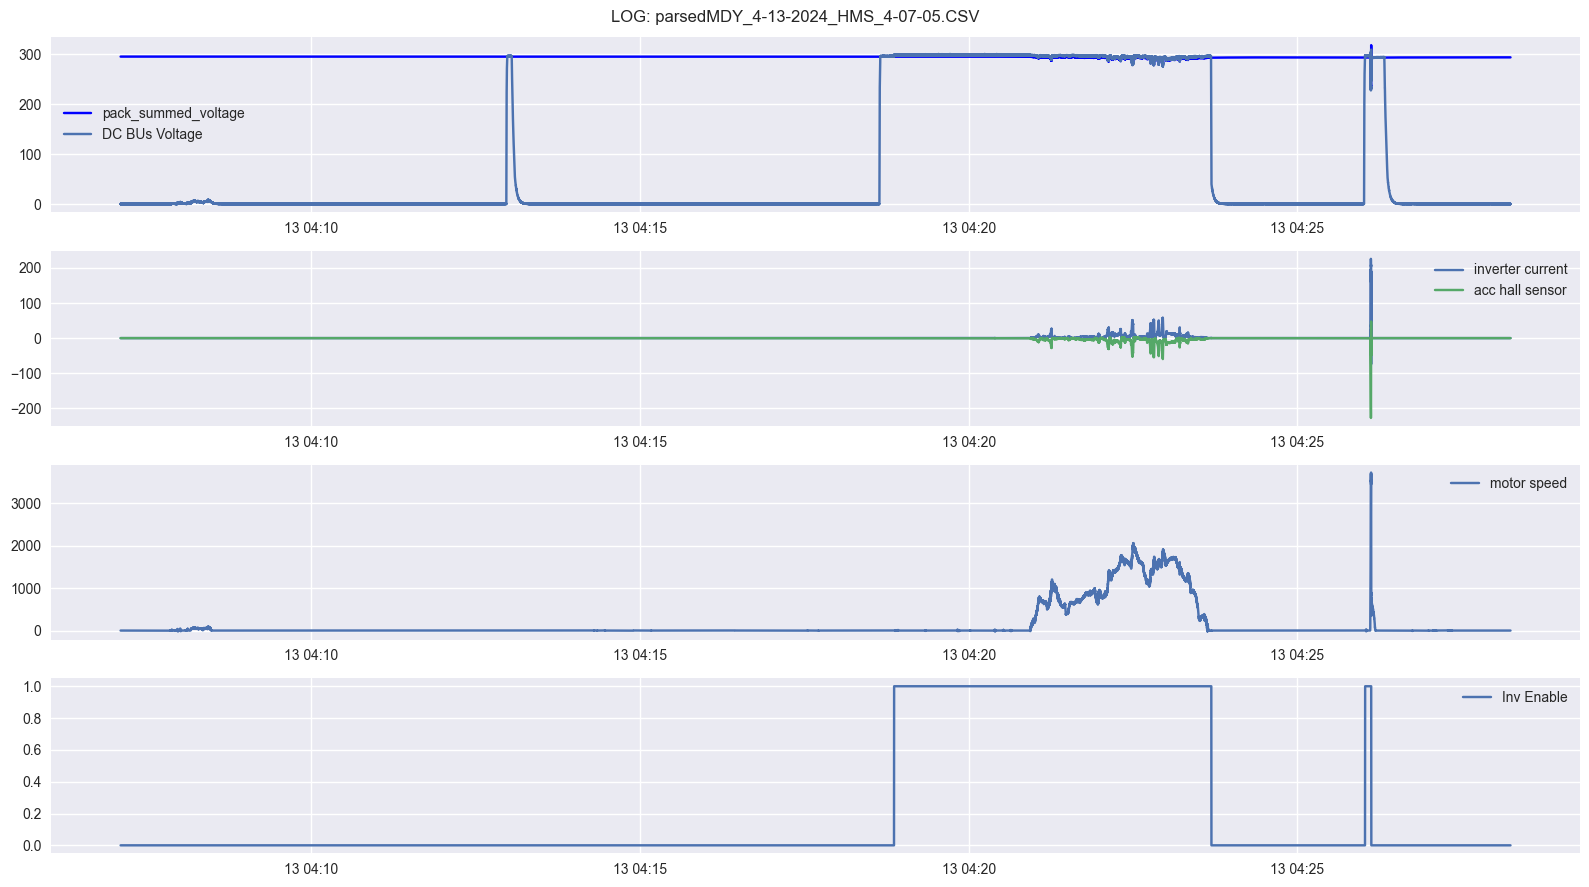

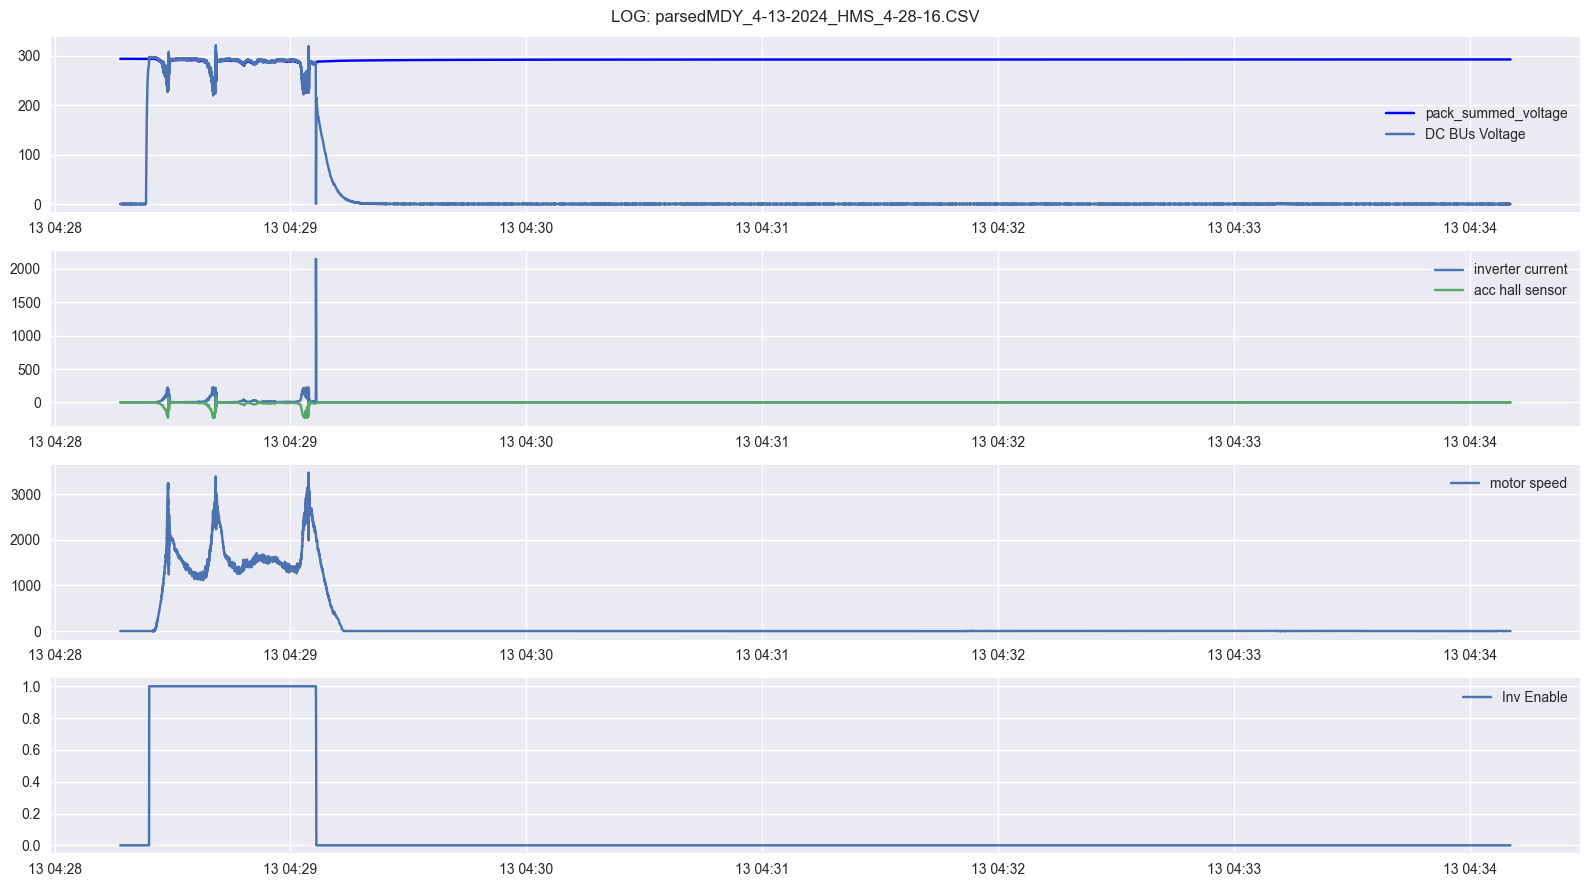

In [25]:
for name,df in logs.items():
    fig,(ax1,ax2,ax3,ax4)= plt.subplots(4,1,figsize=(16,9))

    # plt.plot(df.index,df['D1_DC_Bus_Voltage'],color='r',label='dc bus voltage')
    ax1.plot(df.index,df['Pack_Summed_Voltage'],color='b',label='pack_summed_voltage')
    ax1.plot(df.index,df['D1_DC_Bus_Voltage'],label='DC BUs Voltage')
    ax2.plot(df.index,df["D4_DC_Bus_Current"],label='inverter current')
    ax2.plot(df.index,df['Pack_Current']*-1,label='acc hall sensor')
    ax3.plot(df.index,df['D2_Motor_Speed'],label='motor speed')
    ax4.plot(df.index,df['D6_Inverter_Enable_State'],label='Inv Enable')
    for axis in fig.get_axes():
        axis.legend()
        axis.grid(True)
    plt.suptitle(f"LOG: {name}")
    plt.tight_layout()

    # plt.legend()
    plt.show()
    # plt.plot(df.index)
